# ANALYSIS OF KNOWN CH MUTATIONS (FROM MSKCC) IN UKB DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)

#%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

# MSKCC DATA

In [2]:
### OPEN MSKCC MUTATION DATA
# MUTUATIONS GROUPED BY POSITION HG38 AND REF-ALT

# Open
ch_mskcc = pd.read_csv("/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/MSKCC_ch_mutations.txt.gz", sep="\t")
ch_mskcc

,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence,size
0,chr1,43339388,G,A,MPL,170,missense_variant,1
1,chr1,43339490,C,T,MPL,204,missense_variant,1
2,chr1,43346490,A,T,MPL,342,synonymous_variant,1
3,chr1,43346868,G,A,MPL,414,synonymous_variant,1
4,chr1,43346895,T,C,MPL,423,synonymous_variant,1
...,...,...,...,...,...,...,...,...
3671,chrX,124086699,C,G,STAG2,1069,missense_variant,1
3672,chrX,124086717,C,-,STAG2,1075,frameshift_variant,1
3673,chrX,124090606,G,A,STAG2,1103,stop_gained,1
3674,chrX,124095390,C,T,STAG2,1242,stop_gained,1


In [3]:
# Mutations per gene

# number of mutated genes
print(len(ch_mskcc.groupby(['Hugo_Symbol'])))

# number of mutations per gene
ch_mskcc.groupby(['Hugo_Symbol']).size().sort_values(ascending=False)

54


Hugo_Symbol
DNMT3A    1120
TET2       631
PPM1D      250
ASXL1      193
TP53       157
          ... 
PPARG        5
ERF          5
CDKN1B       4
IDH1         4
SDHAF2       1
Length: 54, dtype: int64

# UKB DATA OF KNOWN MUTATIONS

In [4]:
# Open data

CH_mutations_50K_known = pd.read_csv('/workspace/projects/clonalhemato_ukb/analysis_50k_202103/identify_ch_202104/results/CHmutations_MSKCCknown_50k.txt.gz',
                                    sep= '\t')
CH_mutations_50K_known

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
0,22,28711911,rs752493299,C,T,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant&splice_region_variant,MODERATE,CHEK2,ENST00000382580,919.0,307,A/T,rs752493299,ENSP00000372023,0.000004,0.000000,0/1,"14,2,0",1,NaN,NaN,"1,0,498,43,504,547","13,1,1,1",BaseQRankSum=-1.875;DB;DP=17;ExcessHet=3.0103;...,T|missense_variant&splice_region_variant|MODER...,.,CSQ=T|missense_variant&splice_region_variant|M...,4181038,chr22,28699926.0,C,T,CHEK2,307,missense_variant,1.0
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0
2,4,105276128,rs116519313,T,C,241.77,16,99,0.161616,0.838384,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5618.0,1873,I/T,rs116519313&COSV54396330,ENSP00000442788,0.000013,0.000000,0/1,"83,16,0",99,NaN,NaN,"270,0,2401,518,2449,2967","57,26,10,6",BaseQRankSum=3.114;DB;DP=99;ExcessHet=3.0103;M...,C|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=C|3_prime_UTR_variant&NMD_transcript_varia...,4072725,chr4,105276128.0,T,C,TET2,1873,missense_variant,14.0
3,9,5050713,rs907414891,A,G,0.00,2,19,0.105263,0.894737,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,496.0,166,I/V,rs907414891,ENSP00000371067,NaN,NaN,0/0,"17,2,0",8,0|1,5050706_C_T,"0,8,550,51,556,599","8,9,1,1",BaseQRankSum=-1.722;DB;DP=21;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,4093253,chr9,5050713.0,A,G,JAK2,166,missense_variant,1.0
4,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2,25240359,.,A,C,0.00,9,63,0.142857,0.857143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"54,9,0",16,NaN,NaN,"0,16,1460,159,1485,1628","25,29,0,9",BaseQRankSum=-2.321;DP=63;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,3848350,chr2,25240361.0,A,C,DNMT3A,755,missense_variant,2.0
1093,11,119277836,.,G,A,0.00,2,29,0.068966,0.931034,1,SNV,missense_variant,MODERATE,CBL,ENST00000264033,1087.0,363,V/M,NaN,ENSP00000264033,NaN,NaN,0/0,"27,2,0",38,NaN,NaN,"0,38,889,81,895,939","8,19,1,1",BaseQRankSum=-1.494;DP=29;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,3822096,chr11,119277836.0,G,A,CBL,363,missense_variant,1.0
1094,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.000012,0.000009,0/1,"51,9,0",99,NaN,NaN,"109,0,1568,262,1595,1857","14,37,2,7",BaseQRankSum=-1.609;DB;DP=60;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|D

In [5]:
### Number of different potential CH mutations

print('Total number of CH mutations:')
print(len(CH_mutations_50K_known))
print()
print('Number of different CH mutations:')
print(len(CH_mutations_50K_known.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))

Total number of CH mutations:
1097

Number of different CH mutations:
494


In [6]:
### Number of mutated genes

len(CH_mutations_50K_known.groupby(['SYMBOL']))

43

In [7]:
### Number of patients with CH mutations

len(CH_mutations_50K_known['patient'].value_counts())

1003

In [8]:
### Number of potential CH mutations per patient

CH_mutations_50K_known['patient'].value_counts().value_counts()


1    917
2     78
3      8
Name: patient, dtype: int64

In [9]:
### DP, AD & VAF

round(CH_mutations_50K_known[['DP', 'AD_alt', 'VAF_alt']].describe(), 3)


,DP,AD_alt,VAF_alt
count,1097.000,1097.000,1097.000
mean,59.992,8.423,0.137
std,37.093,6.709,0.062
min,8.000,2.000,0.041
25%,32.000,2.000,0.093
50%,54.000,7.000,0.125
75%,81.000,12.000,0.167
max,274.000,44.000,0.299


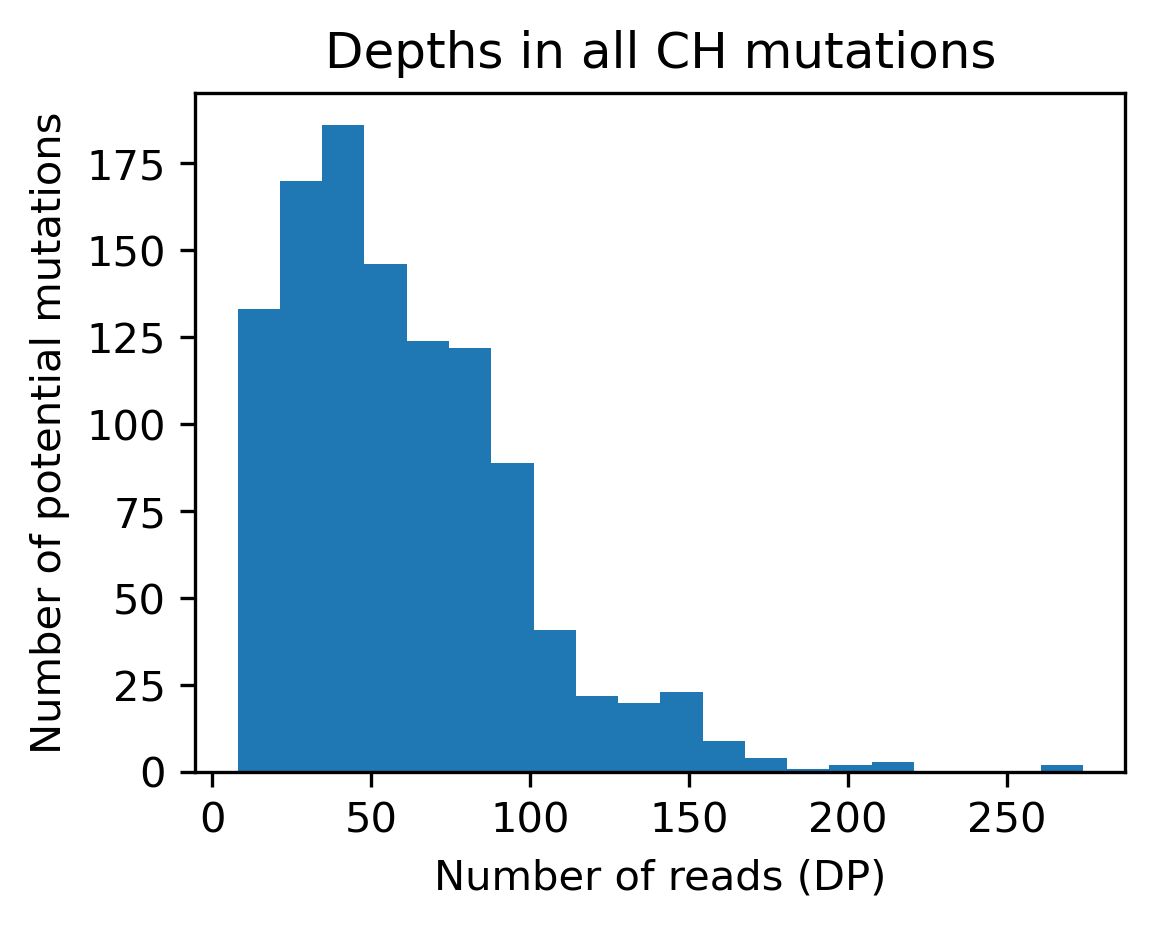

In [10]:
# Histogram DP

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_50K_known['DP'], 20)
plt.title('Depths in all CH mutations')
plt.xlabel('Number of reads (DP)')
plt.ylabel('Number of potential mutations')
plt.show()

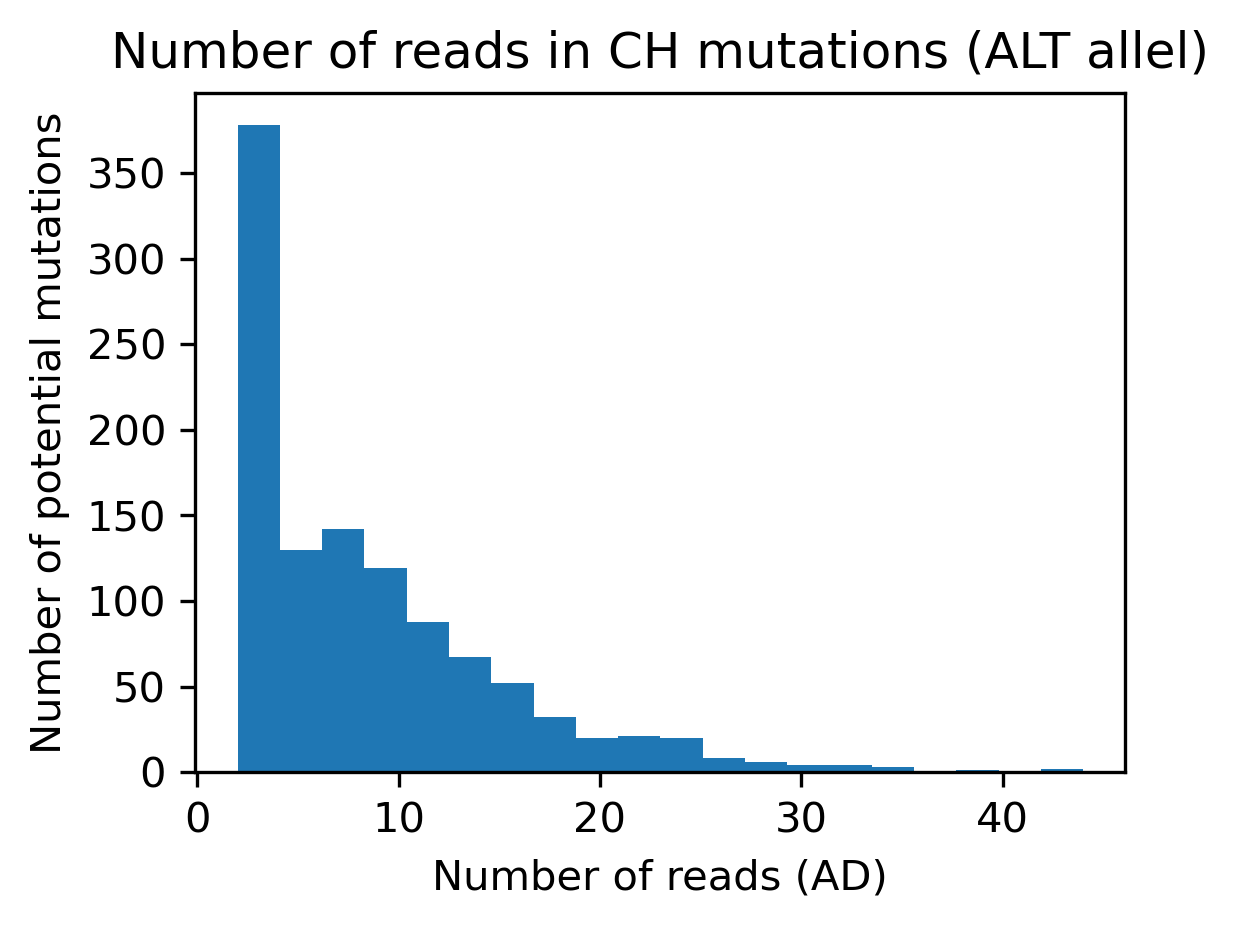

In [11]:
# Histogram AD

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_50K_known['AD_alt'], 20)
plt.title('Number of reads in CH mutations (ALT allel)')
plt.xlabel('Number of reads (AD)')
plt.ylabel('Number of potential mutations')
plt.show()

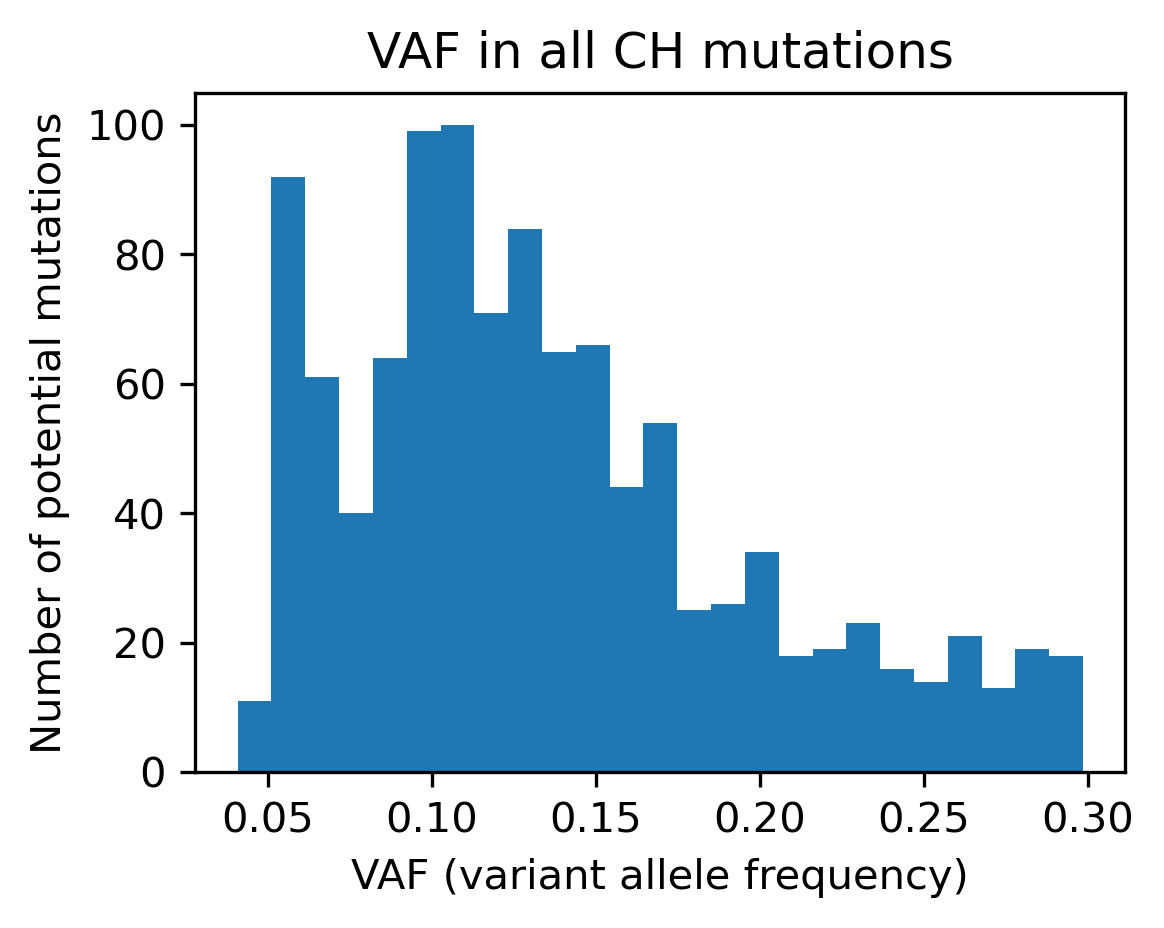

In [12]:
# Histogram VAF

plt.hist(CH_mutations_50K_known['VAF_alt'], 25)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF (variant allele frequency)')
plt.ylabel('Number of potential mutations')
plt.show()

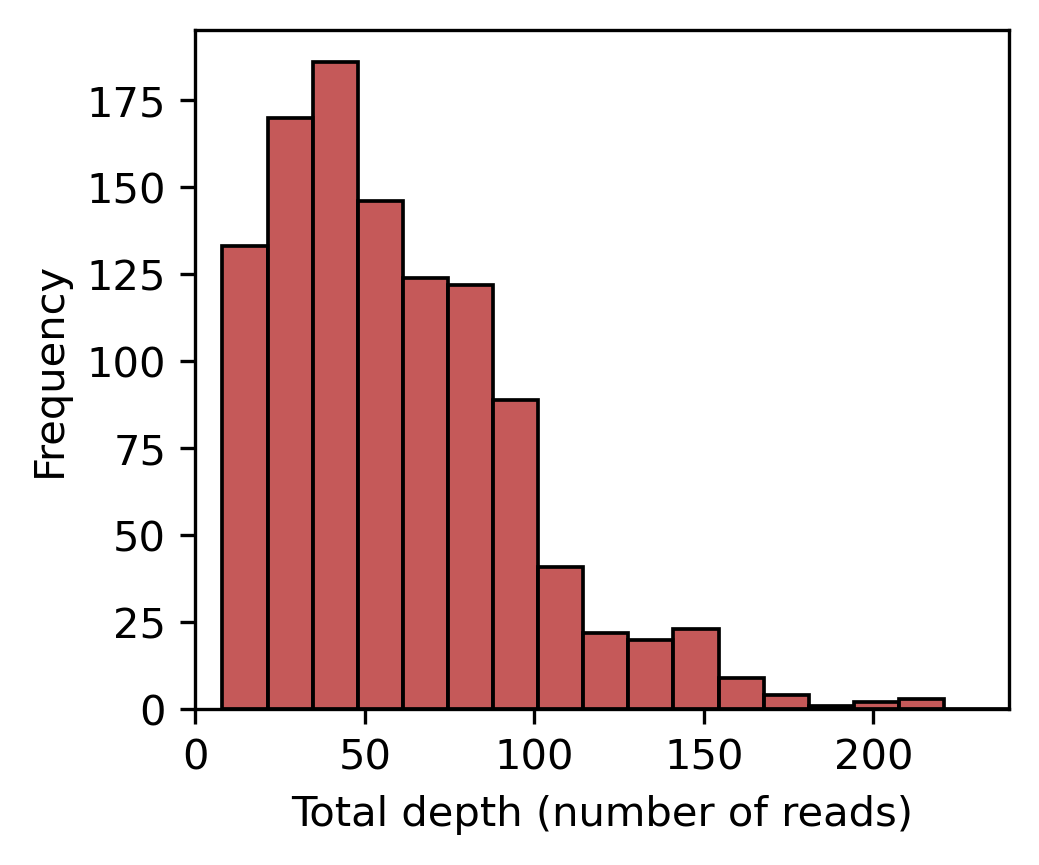

In [13]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(CH_mutations_50K_known['DP'], bins=20, color="firebrick")
graph.set(xlabel="Total depth (number of reads)", ylabel="Frequency", xlim=[0,240])
plt.show()

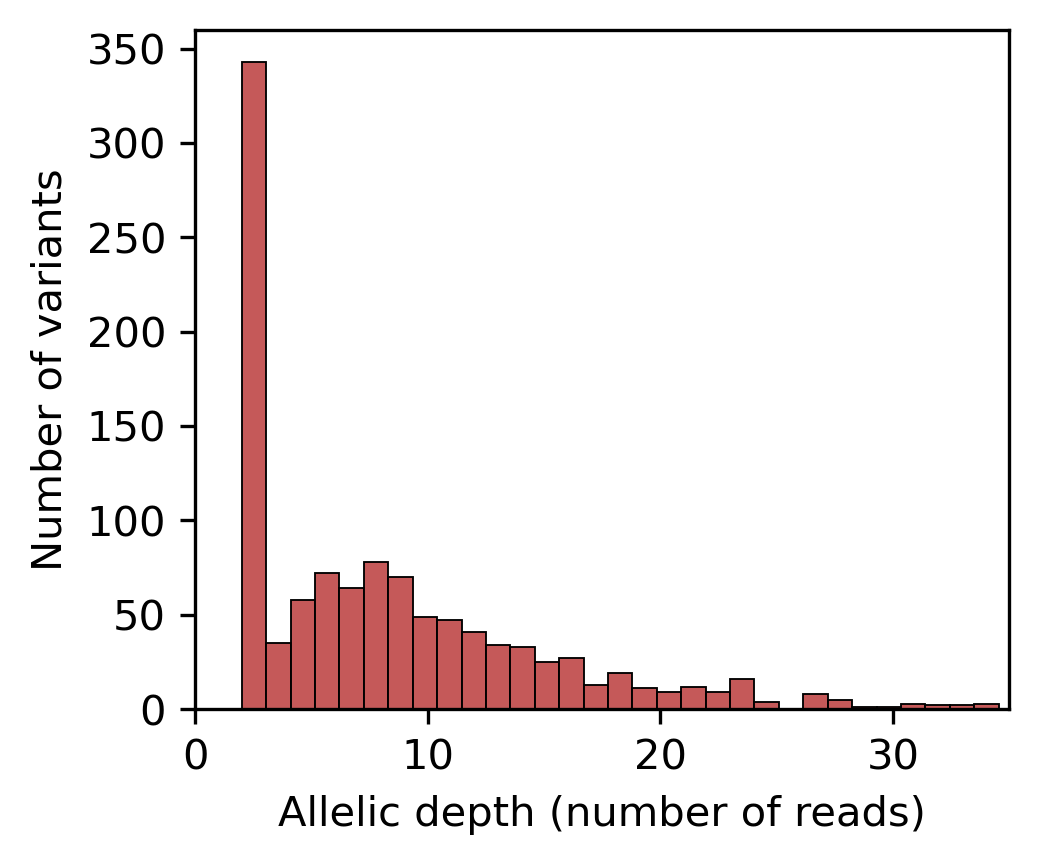

In [14]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(CH_mutations_50K_known['AD_alt'], bins=40, color="firebrick")
graph.set(xlabel="Allelic depth (number of reads)", ylabel="Number of variants", xlim=[0,35])
plt.show()

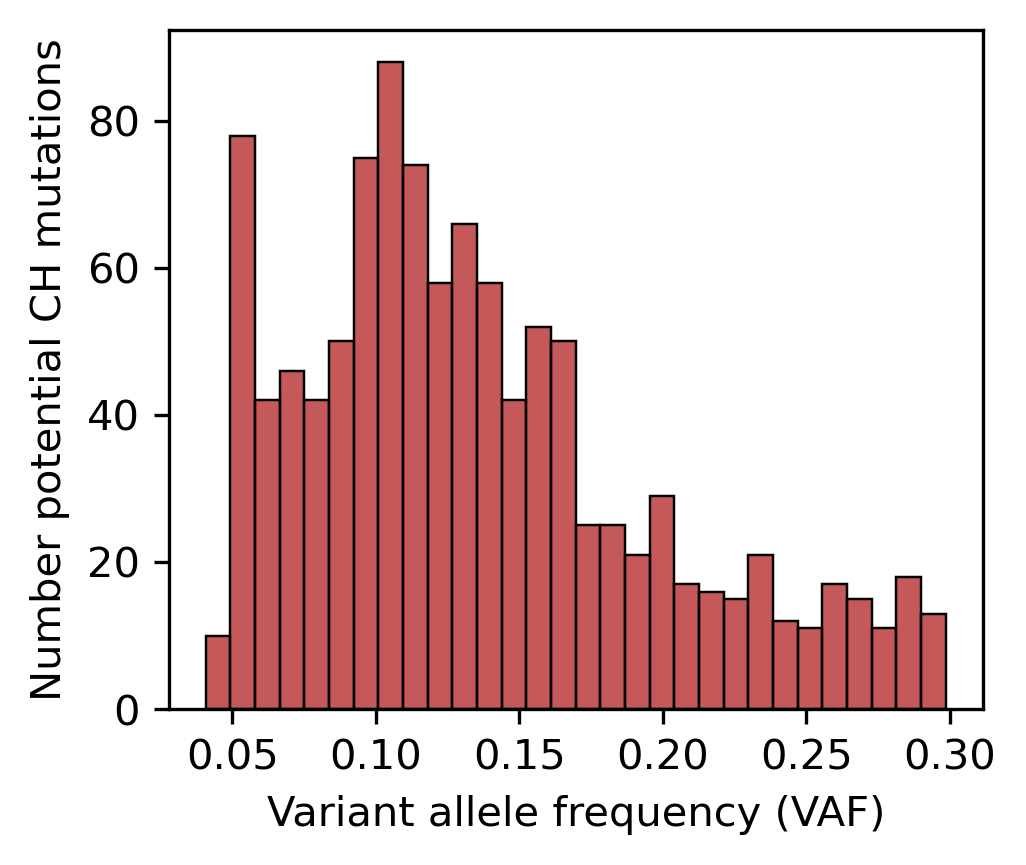

In [15]:
plt.rcParams["figure.figsize"] = (3.5,3)
graph = sns.histplot(CH_mutations_50K_known['VAF_alt'], bins=30, color="firebrick")
graph.set(xlabel="Variant allele frequency (VAF)", ylabel="Number potential CH mutations")
plt.show()

In [16]:
VAFs = CH_mutations_50K_known['VAF_alt']

print("Total number of variants:")
print(len(VAFs))
print()

print("Number of variants with VAF < 25%:")
VAF_25 = [i for i in VAFs if i < 0.25]
print(len(VAF_25))
print(round(len(VAF_25) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 20%:")
VAF_20 = [i for i in VAFs if i < 0.20]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 15%:")
VAF_20 = [i for i in VAFs if i < 0.15]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 10%:")
VAF_20 = [i for i in VAFs if i < 0.10]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

Total number of variants:
1097

Number of variants with VAF < 25%:
1012
92.3

Number of variants with VAF < 20%:
909
82.9

Number of variants with VAF < 15%:
713
65.0

Number of variants with VAF < 10%:
330
30.1



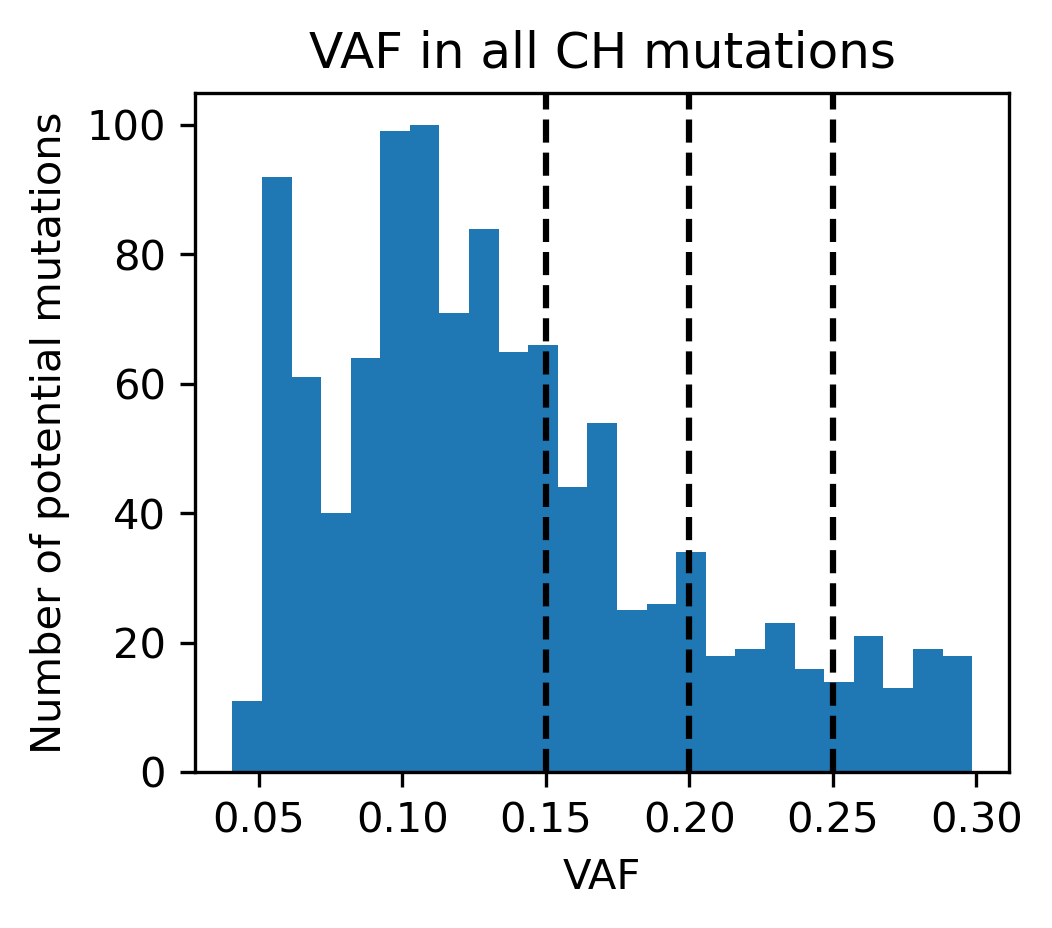

In [17]:
# Histogram VAF with thresholds

plt.hist(CH_mutations_50K_known['VAF_alt'], 25)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.axvline(x=0.25, color='black',linestyle='--')
plt.axvline(x=0.2, color='black',linestyle='--')
plt.axvline(x=0.15, color='black',linestyle='--')
#plt.axvline(x=0.1, color='black',linestyle='--')
plt.show()

In [18]:
### Number of ALT per position

CH_mutations_50K_known['ALT_num'].value_counts()

1    1094
2       3
Name: ALT_num, dtype: int64

In [19]:
### Type of variant

CH_mutations_50K_known['var_type'].value_counts()

SNV    1097
Name: var_type, dtype: int64

In [20]:
### Type of consequence

round(CH_mutations_50K_known['Consequence_x'].value_counts() / 1097 * 100, 1)

missense_variant                          73.5
stop_gained                               20.9
missense_variant&splice_region_variant     4.6
stop_gained&splice_region_variant          1.1
Name: Consequence_x, dtype: float64

In [21]:
round(CH_mutations_50K_known['Consequence_x'].apply(lambda x: x.split('&')[0]).value_counts() / 1097 * 100, 1)

missense_variant    78.0
stop_gained         22.0
Name: Consequence_x, dtype: float64

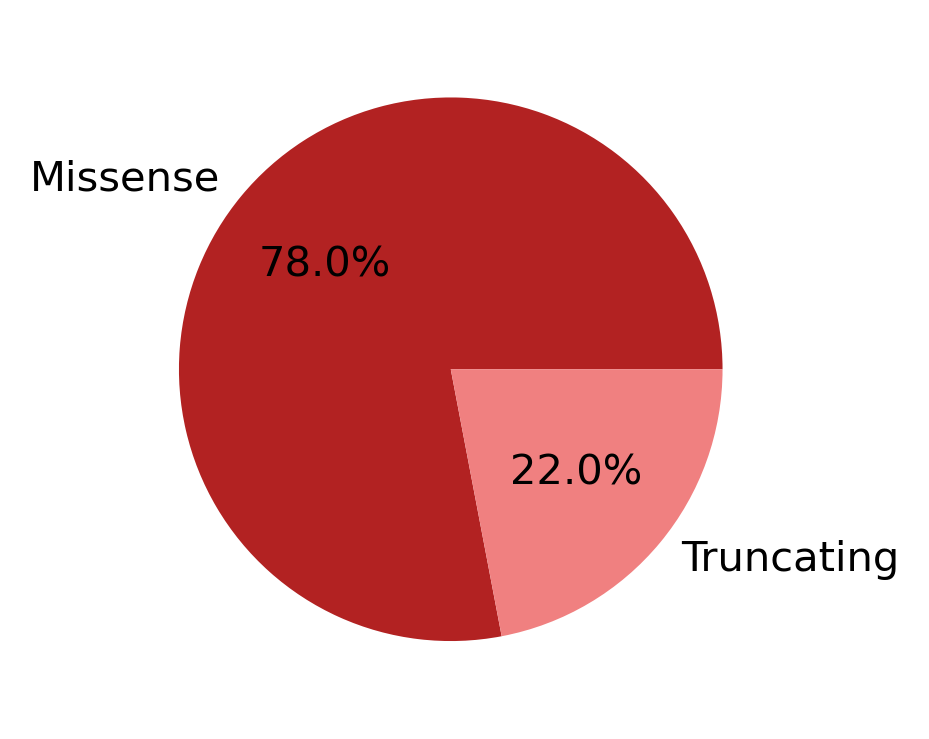

In [22]:
sizes= [78, 22]
labels= "Missense", "Truncating"
colors= "firebrick", "lightcoral"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct='%1.1f%%', colors=colors)
plt.show()

In [23]:
### IMPACT

round(CH_mutations_50K_known['IMPACT'].value_counts().head(20) / 1097 * 100, 1)

MODERATE    78.0
HIGH        22.0
Name: IMPACT, dtype: float64

In [67]:
### Mutations per gene

CH_mutations_50K_known.groupby(['SYMBOL']).size().sort_values(ascending=False)

SYMBOL
DNMT3A    513
TET2      111
ATM        60
KMT2C      41
JAK2       38
         ... 
PPARG       1
RET         1
SDHAF2      1
STAT3       1
MGA         1
Length: 43, dtype: int64

Text(0.5, 0, 'CH driver gene')

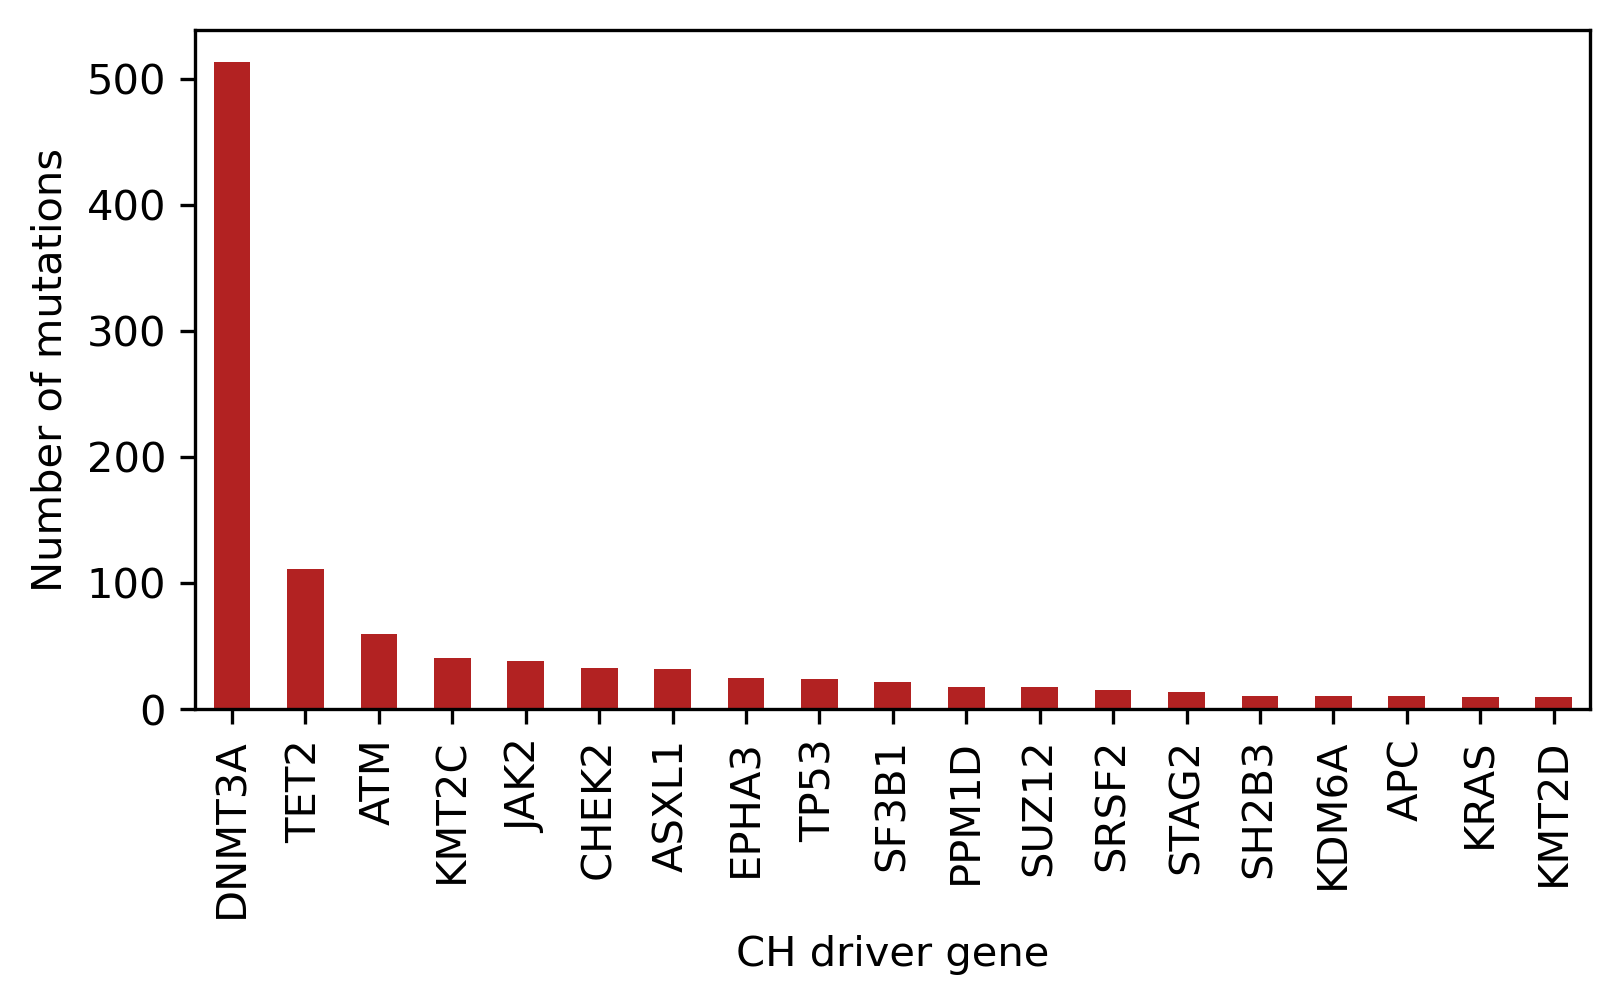

In [25]:
# Histogram

graph = CH_mutations_50K_known.groupby(['SYMBOL']).size().sort_values(ascending=False)[:19].plot.bar(figsize=(6,3), color="firebrick")
graph.set_ylabel("Number of mutations")
graph.set_xlabel("CH driver gene")
#graph.set_title("Number of mutations per gene")

Text(0.5, 0, 'CH driver gene')

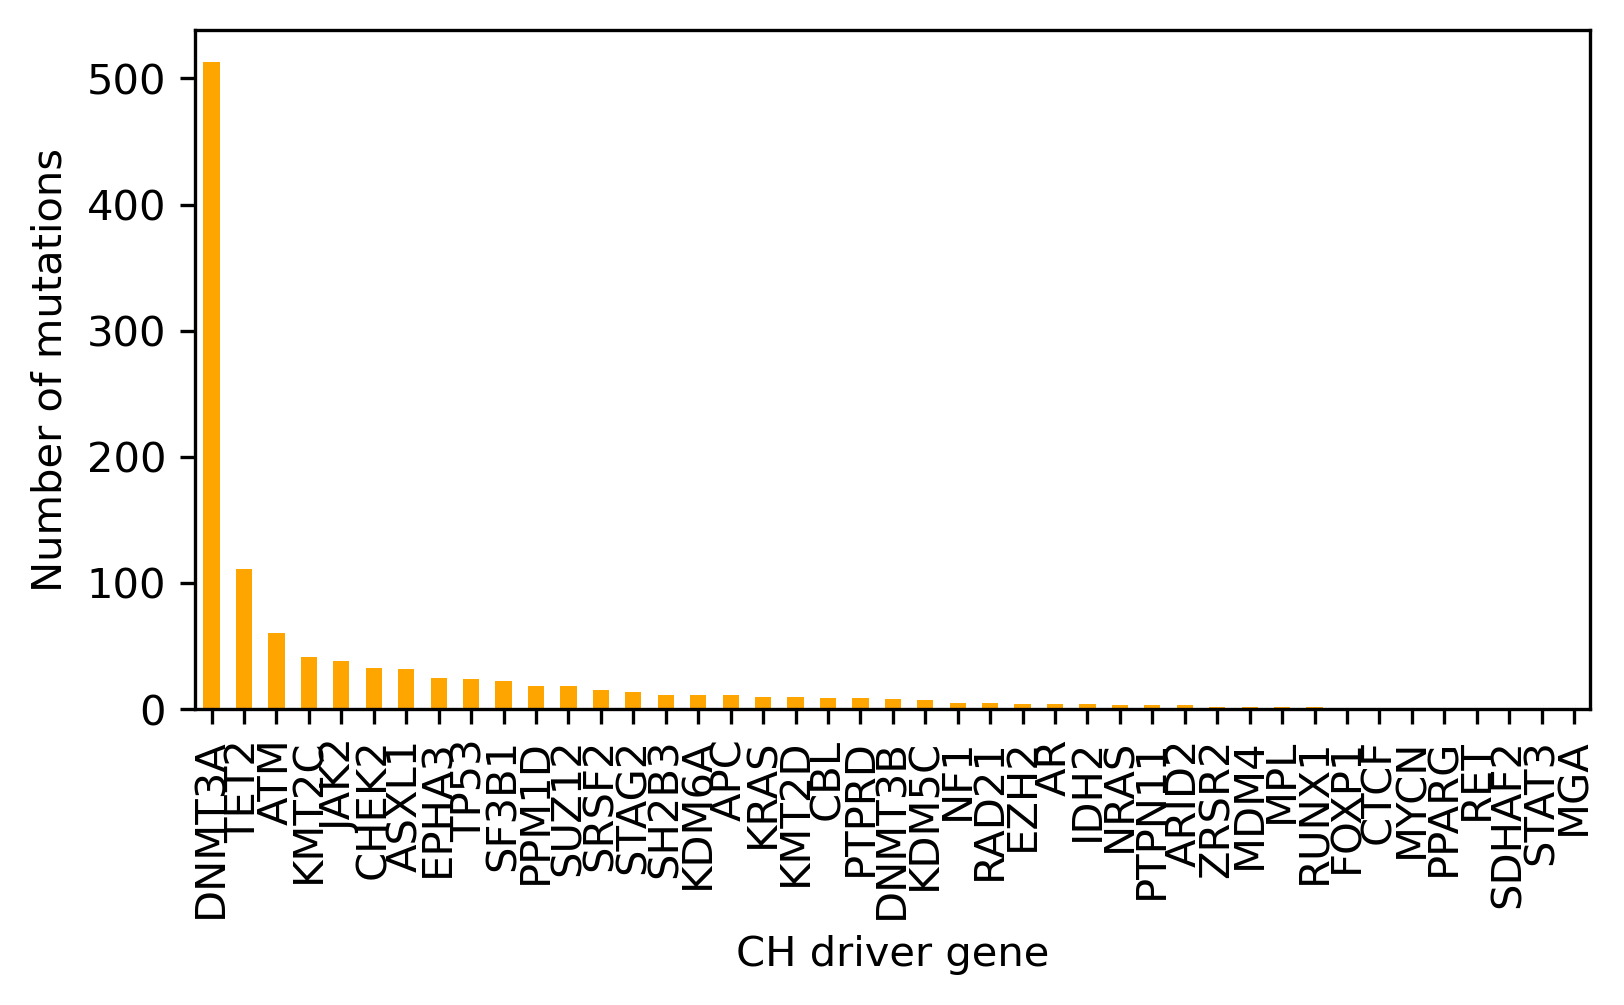

In [26]:
# Histogram

graph = CH_mutations_50K_known.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(6,3),color="orange")
graph.set_ylabel("Number of mutations")
graph.set_xlabel("CH driver gene")

In [68]:
#from IPython.core.display import HTML

### Mutations per gene position

mut_genpos = CH_mutations_50K_known.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False)
df = mut_genpos.to_frame()
df = df.reset_index()
df.columns = ['CH driver gene','Protein position','Number mutations']
df.head(20).style.set_properties(**{'text-align':'center'})
#display(a)
#display(HTML(mut_genpos.head(20).to_frame().to_html()))

,CH driver gene,Protein position,Number mutations
0,DNMT3A,882,91
1,JAK2,617,32
2,ATM,23,20
3,KMT2C,836,18
4,SUZ12,160,16
5,EPHA3,898,14
6,DNMT3A,736,14
7,SRSF2,95,14
8,DNMT3A,771,13
9,DNMT3A,904,12


In [28]:
### Number of mutation sites per gene

mut_genpos_n =mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False)
df = mut_genpos_n.to_frame()
df = df.reset_index()
df.columns = ['CH driver gene','Number mutation sites']
df.head(10).style.set_properties(**{'text-align':'center'})



,CH driver gene,Number mutation sites
0,DNMT3A,136
1,TET2,70
2,ATM,23
3,ASXL1,19
4,TP53,18
5,KMT2C,15
6,CHEK2,13
7,PPM1D,10
8,SF3B1,10
9,KDM6A,6


Text(0.5, 1.0, 'Number of mutation sites per gene')

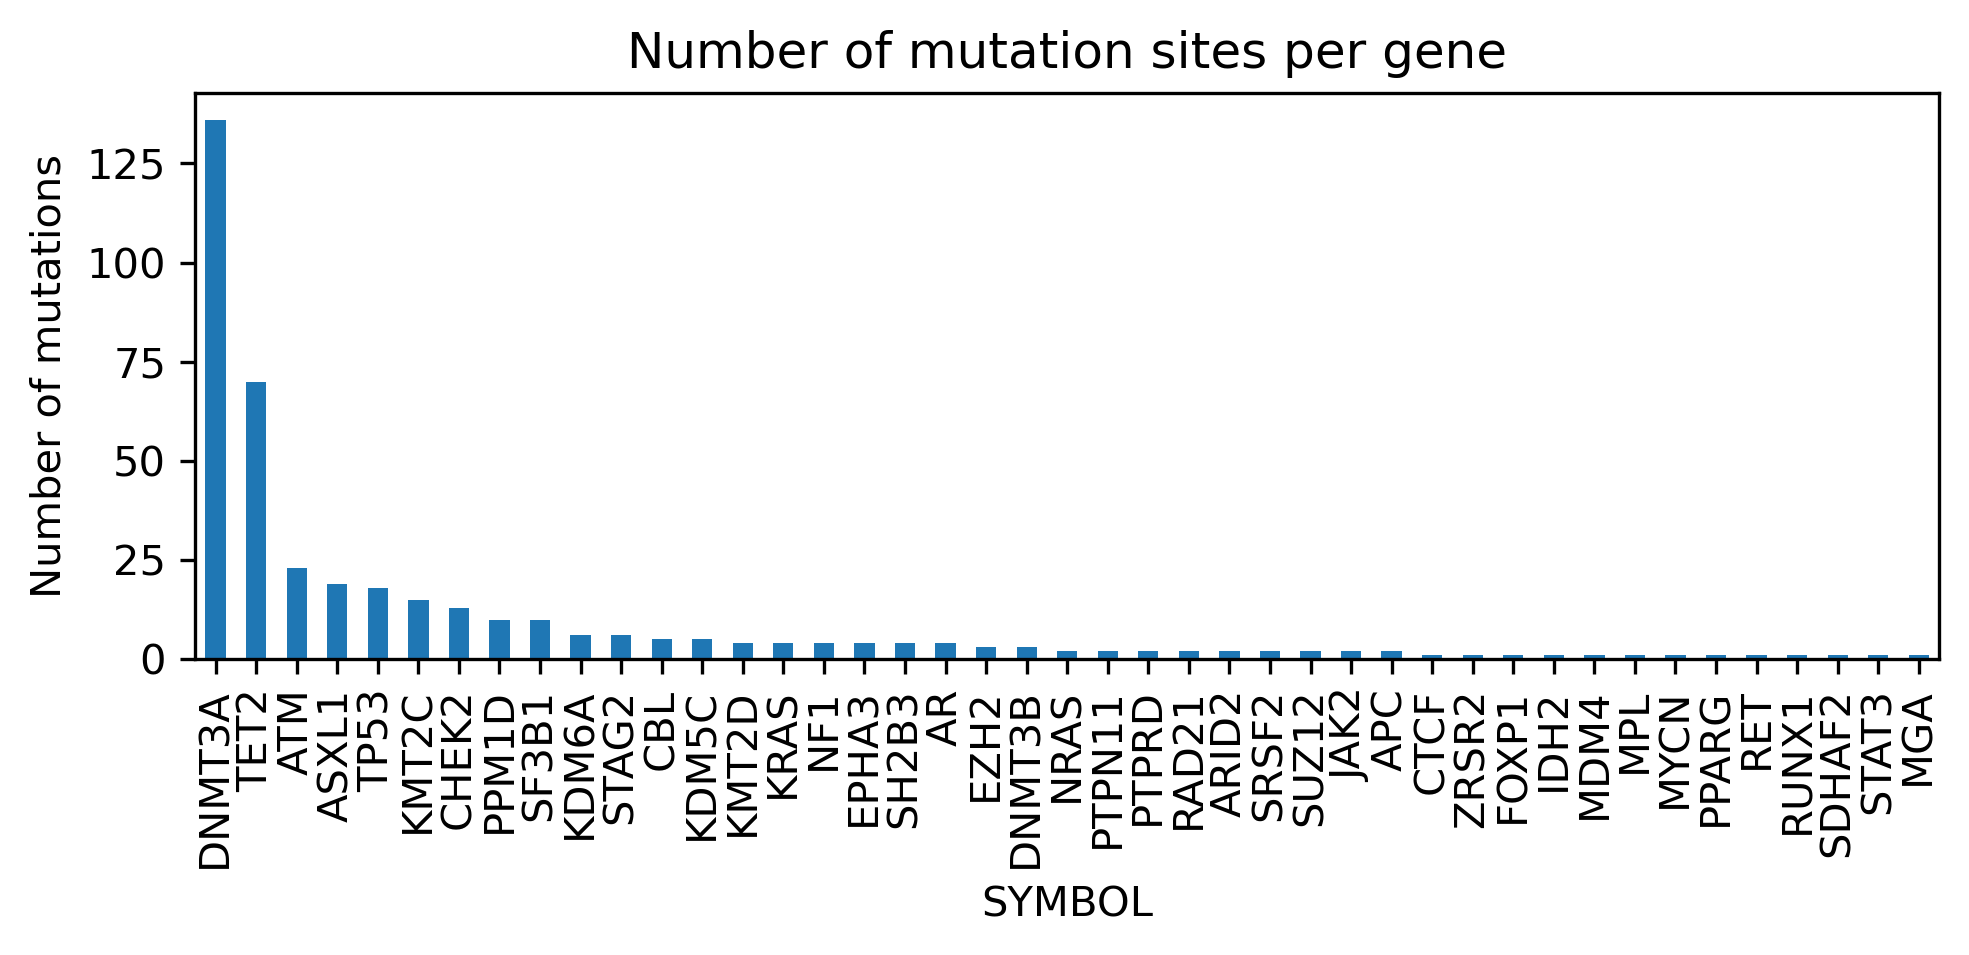

In [29]:
# Histogram

graph = mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(7.5,2.5))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutation sites per gene")

# STUDY MOST FREQUENT MUTATIONS

In [30]:
### DNMT3A-882

DNMT3A_882 = CH_mutations_50K_known[(CH_mutations_50K_known['SYMBOL'] == 'DNMT3A') & (CH_mutations_50K_known['Prot_pos'] == 882)]
DNMT3A_882

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
35,2,25234373,rs147001633,C,T,283.77,18,98,0.183673,0.816327,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"80,18,0",99,NaN,NaN,"312,0,2445,552,2499,3052","27,53,10,8",BaseQRankSum=0.690;DB;DP=98;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4169546,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0
60,2,25234373,rs147001633,C,T,7.60,6,54,0.111111,0.888889,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"48,6,0",35,NaN,NaN,"35,0,1494,178,1512,1691","21,27,1,5",BaseQRankSum=-0.598;DB;DP=54;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4407182,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0
63,2,25234374,rs377577594,G,A,162.77,9,50,0.180000,0.820000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2644.0,882,R/C,rs377577594&COSV53036332&COSV53037241&COSV5306...,ENSP00000264709,0.000123,0.000123,0/1,"41,9,0",99,NaN,NaN,"191,0,1359,314,1386,1700","16,25,7,2",BaseQRankSum=0.343;DB;DP=50;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4446002,chr2,25234374.0,G,A,DNMT3A,882,missense_variant,81.0
65,2,25234373,rs147001633,C,T,163.77,9,52,0.173077,0.826923,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"43,9,0",99,NaN,NaN,"192,0,1428,322,1455,1777","18,25,4,5",BaseQRankSum=1.219;DB;DP=52;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4366533,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0
73,2,25234373,rs147001633,C,T,228.77,13,62,0.209677,0.790323,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"49,13,0",99,NaN,NaN,"257,0,1565,405,1604,2009","21,28,5,8",BaseQRankSum=-0.452;DB;DP=62;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4736540,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2,25234373,rs147001633,C,T,25.78,6,57,0.105263,0.894737,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"51,6,0",54,NaN,NaN,"54,0,1671,208,1689,1896","19,32,3,3",BaseQRankSum=1.084;DB;DP=58;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,3910742,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0
1081,2,25234373,rs147001633,C,T,78.77,7,43,0.162791,0.837209,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2645.0,882,R/H,rs147001633&COSV53036153&COSV53040144&COSV5304...,ENSP00000264709,0.000219,0.000159,0/1,"36,7,0",99,NaN,NaN,"107,0,1148,215,1169,1384","11,25,3,4",BaseQRankSum=1.022;DB;DP=43;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,3925881,chr2,25234373.0,C,T,DNMT3A,882,missense_variant,142.0
1083,2,25234373,rs147001633,C,T,0.00,6,63,0.095238,0.904762,

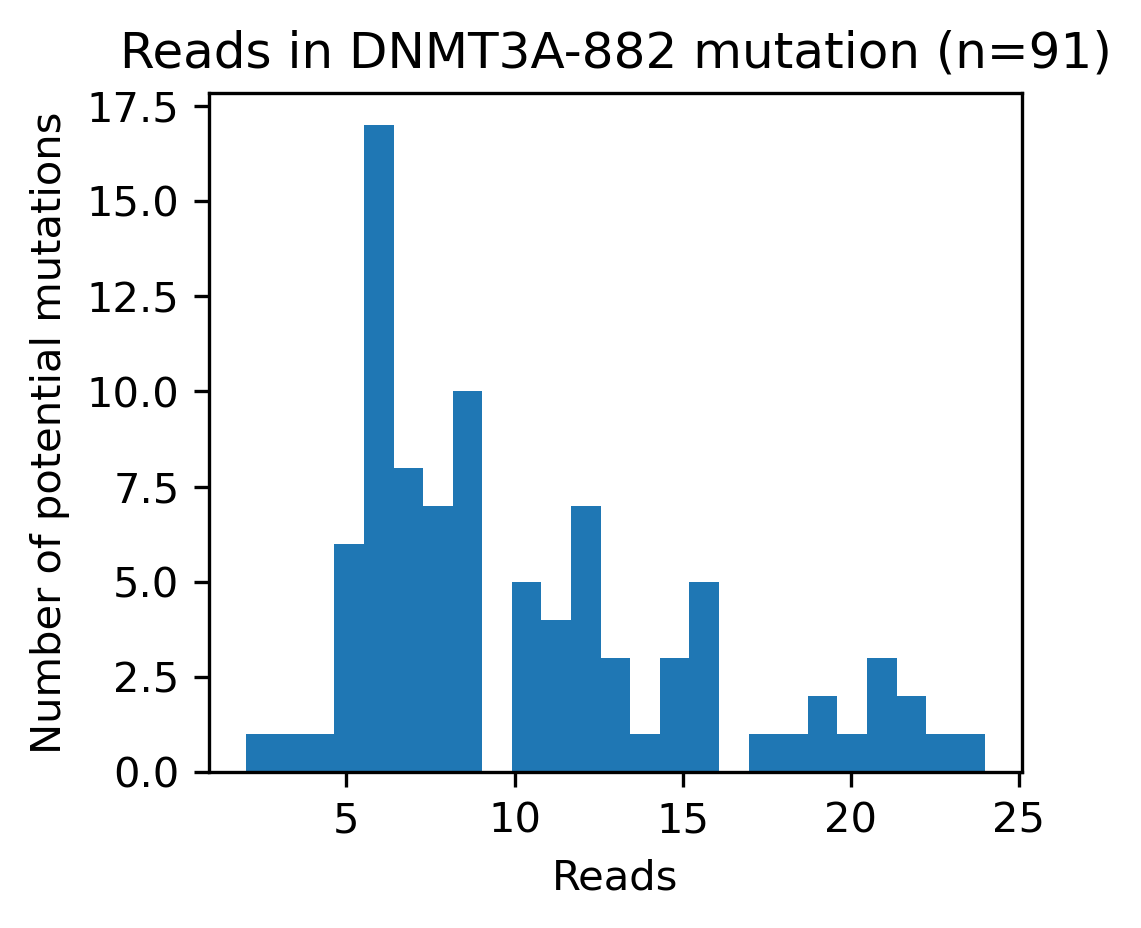

In [31]:
# Histogram reads
plt.hist(DNMT3A_882['AD_alt'], 25)
plt.title('Reads in DNMT3A-882 mutation (n=91)')
plt.xlabel('Reads')
plt.ylabel('Number of potential mutations')
plt.show()

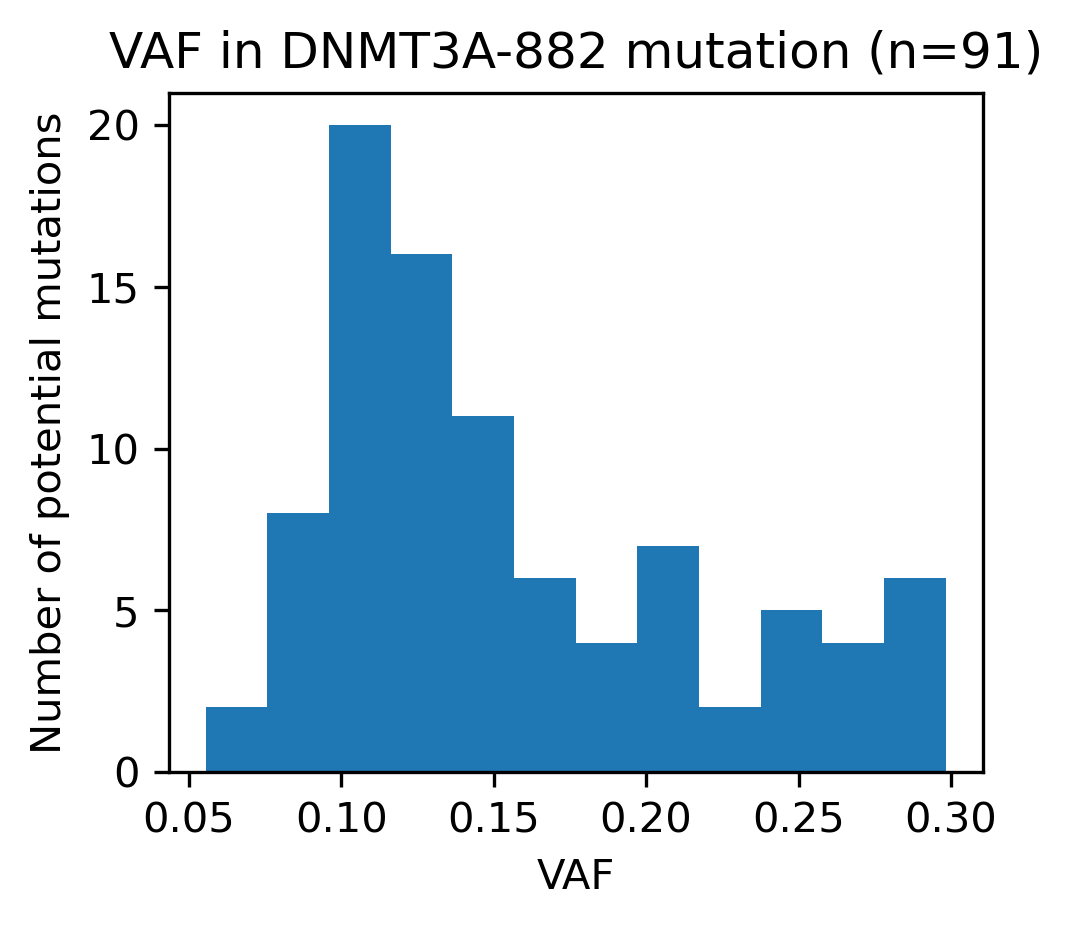

In [32]:
# Histogram
plt.hist(DNMT3A_882['VAF_alt'], 12)
plt.title('VAF in DNMT3A-882 mutation (n=91)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()

In [33]:
### JAK2_617

JAK2_617 = CH_mutations_50K_known[(CH_mutations_50K_known['SYMBOL'] == 'JAK2') & (CH_mutations_50K_known['Prot_pos'] == 617)]
JAK2_617

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
102,9,5073770,rs77375493,G,T,10.20,3,17,0.176471,0.823529,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"14,3,0",38,NaN,NaN,"38,0,489,80,498,579","5,9,1,2",BaseQRankSum=-1.430;DB;DP=17;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,4128684,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
135,9,5073770,rs77375493,G,T,24.78,4,26,0.153846,0.846154,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"22,4,0",53,NaN,NaN,"53,0,766,119,778,897","7,15,1,3",BaseQRankSum=-1.567;DB;DP=26;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,5040938,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
164,9,5073770,rs77375493,G,T,0.39,4,36,0.111111,0.888889,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"32,4,0",18,NaN,NaN,"18,0,1083,114,1095,1209","12,20,1,3",BaseQRankSum=-1.500;DB;DP=36;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,4208883,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
295,9,5073770,rs77375493,G,T,72.77,6,35,0.171429,0.828571,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"29,6,0",99,NaN,NaN,"101,0,908,188,926,1113","7,22,1,5",BaseQRankSum=-1.059;DB;DP=35;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,5637137,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
321,9,5073770,rs77375493,G,T,83.77,4,15,0.266667,0.733333,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"11,4,0",99,NaN,NaN,"112,0,344,145,356,501","5,6,1,3",BaseQRankSum=0.200;DB;DP=15;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,5499421,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,9,5073770,rs77375493,G,T,18.82,4,27,0.148148,0.851852,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"23,4,0",47,NaN,NaN,"47,0,812,116,824,940","6,17,2,2",BaseQRankSum=-1.789;DB;DP=27;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,3325144,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
1002,9,5073770,rs77375493,G,T,64.77,5,30,0.166667,0.833333,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP00000371067,0.000352,0.000397,0/1,"25,5,0",93,NaN,NaN,"93,0,674,168,689,857","6,19,1,4",BaseQRankSum=2.373;DB;DP=31;ExcessHet=3.0103;M...,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|JAK2|ENSG00000...,3935304,chr9,5073770.0,G,T,JAK2,617,missense_variant,74.0
1016,9,5073770,rs77375493,G,T,57.77,4,23,0.173913,0.826087,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,1849.0,617,V/F,rs77375493&CM123094&COSV67569051&COSV67571909,ENSP

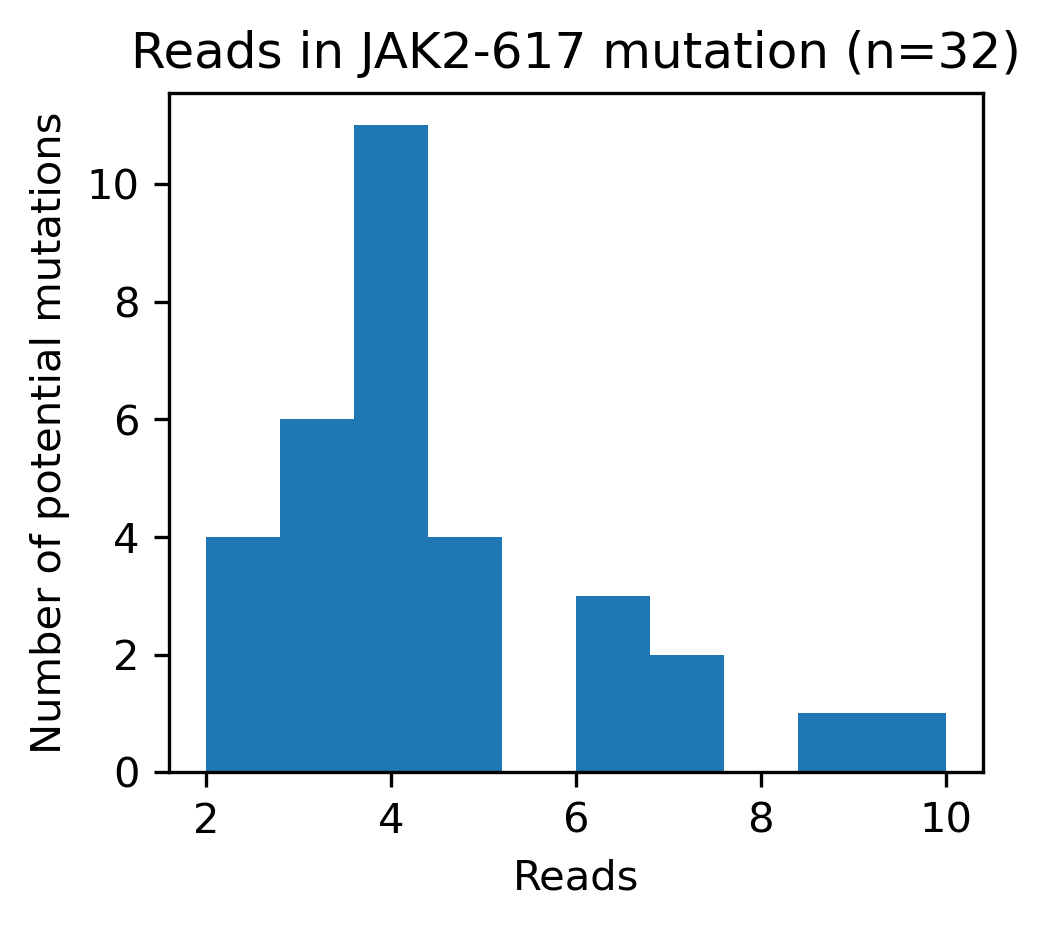

In [34]:
# Histogram reads
plt.hist(JAK2_617['AD_alt'], 10)
plt.title('Reads in JAK2-617 mutation (n=32)')
plt.xlabel('Reads')
plt.ylabel('Number of potential mutations')
plt.show()

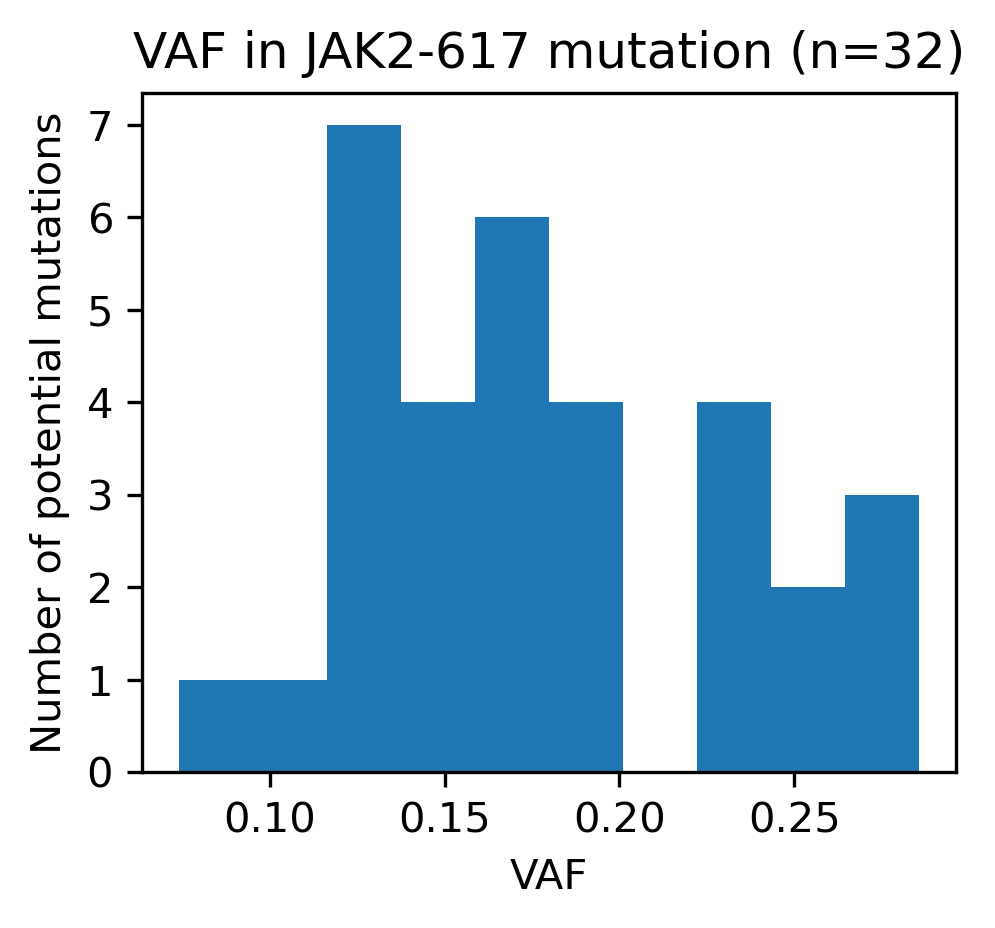

In [35]:
# Histogram
plt.hist(JAK2_617['VAF_alt'], 10)
plt.title('VAF in JAK2-617 mutation (n=32)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()

In [36]:
### ATM_23

ATM_23 = CH_mutations_50K_known[(CH_mutations_50K_known['SYMBOL'] == 'ATM') & (CH_mutations_50K_known['Prot_pos'] == 23)]
ATM_23

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
75,11,108227691,rs746235533,C,T,0.00,2,27,0.074074,0.925926,1,SNV,stop_gained,HIGH,ATM,ENST00000278616,67.0,23,R/*,rs746235533&CM024724&COSV53733622,ENSP00000278616,0.00002,0.000018,0/0,"25,2,0",30,NaN,NaN,"0,30,690,74,696,739","8,17,1,1",BaseQRankSum=-1.542;DB;DP=27;ExcessHet=3.0103;...,CSQ=T|stop_gained|HIGH|ATM|ENSG00000149311|Tra...,.,CSQ=T|stop_gained|HIGH|ATM|ENSG00000149311|Tra...,4360913,chr11,108227691.0,C,T,ATM,23,stop_gained,1.0
90,11,108227691,rs746235533,C,T,0.00,2,34,0.058824,0.941176,1,SNV,stop_gained,HIGH,ATM,ENST00000278616,67.0,23,R/*,rs746235533&CM024724&COSV53733622,ENSP00000278616,0.00002,0.000018,0/0,"32,2,0",53,NaN,NaN,"0,53,1028,96,1034,1077","15,17,1,1",BaseQRankSum=-1.771;DB;DP=34;ExcessHet=3.0103;...,CSQ=T|stop_gained|HIGH|ATM|ENSG00000149311|Tra...,.,CSQ=T|stop_gained|HIGH|ATM|ENSG00000149311|Tra...,4766788,chr11,108227691.0,C,T,ATM,23,stop_gained,1.0
94,11,108227692,rs587779858,G,A,0.00,2,21,0.095238,0.904762,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/Q,rs587779858&COSV53740048,ENSP00000278616,NaN,NaN,0/0,"19,2,0",14,NaN,NaN,"0,14,576,57,582,626","11,8,1,1",BaseQRankSum=-1.546;DB;DP=21;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,4679870,chr11,108227692.0,G,A,ATM,23,missense_variant,1.0
159,11,108227692,rs587779858,G,A,0.00,2,27,0.074074,0.925926,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/Q,rs587779858&COSV53740048,ENSP00000278616,NaN,NaN,0/0,"25,2,0",32,NaN,NaN,"0,32,865,75,871,914","12,13,1,1",BaseQRankSum=-1.919;DB;DP=27;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,4585156,chr11,108227692.0,G,A,ATM,23,missense_variant,1.0
188,11,108227692,rs587779858,G,A,0.00,2,28,0.071429,0.928571,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/Q,rs587779858&COSV53740048,ENSP00000278616,NaN,NaN,0/0,"26,2,0",35,NaN,NaN,"0,35,838,78,844,887","14,12,1,1",BaseQRankSum=-1.788;DB;DP=28;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,5004129,chr11,108227692.0,G,A,ATM,23,missense_variant,1.0
197,11,108227692,.,G,C,0.00,2,29,0.068966,0.931034,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/P,COSV53740048,ENSP00000278616,NaN,NaN,0/0,"27,2,0",38,NaN,NaN,"0,38,875,81,881,924","16,11,1,1",BaseQRankSum=-1.648;DP=29;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=C|missense_variant|MODERATE|ATM|ENSG000001...,4548607,chr11,108227692.0,G,C,ATM,23,missense_variant,1.0
232,11,108227692,rs587779858,G,A,0.00,2,38,0.052632,0.947368,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/Q,rs587779858&COSV53740048,ENSP00000278616,NaN,NaN,0/0,"36,2,0",64,NaN,NaN,"0,64,1171,108,1177,1220","17,19,1,1",BaseQRankSum=-1.692;DB;DP=38;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|ATM|ENSG000001...,4900430,chr11,108227692.0,G,A,ATM,23,missense_variant,1.0
268,11,108227692,.,G,C,0.00,2,39,0.051282,0.948718,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/P,COSV53740048,ENSP00000278616,NaN,NaN,0/0,"37,2,0",27,0|1,108227692_G_C,"0,27,1704,111,1710,1794","19,18,1,1",BaseQRankSum=-1.723;DP=39;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|ATM|ENSG000001...,.,CSQ=C|missense_variant|MODERATE|ATM|ENSG000001...,5514084,chr11,108227692.0,G,C,ATM,23,missense_variant,1.0
272,11,108227692,rs587779858,G,A,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant,MODERATE,ATM,ENST00000278616,68.0,23,R/Q,rs587779858&COSV53740048,ENSP00000

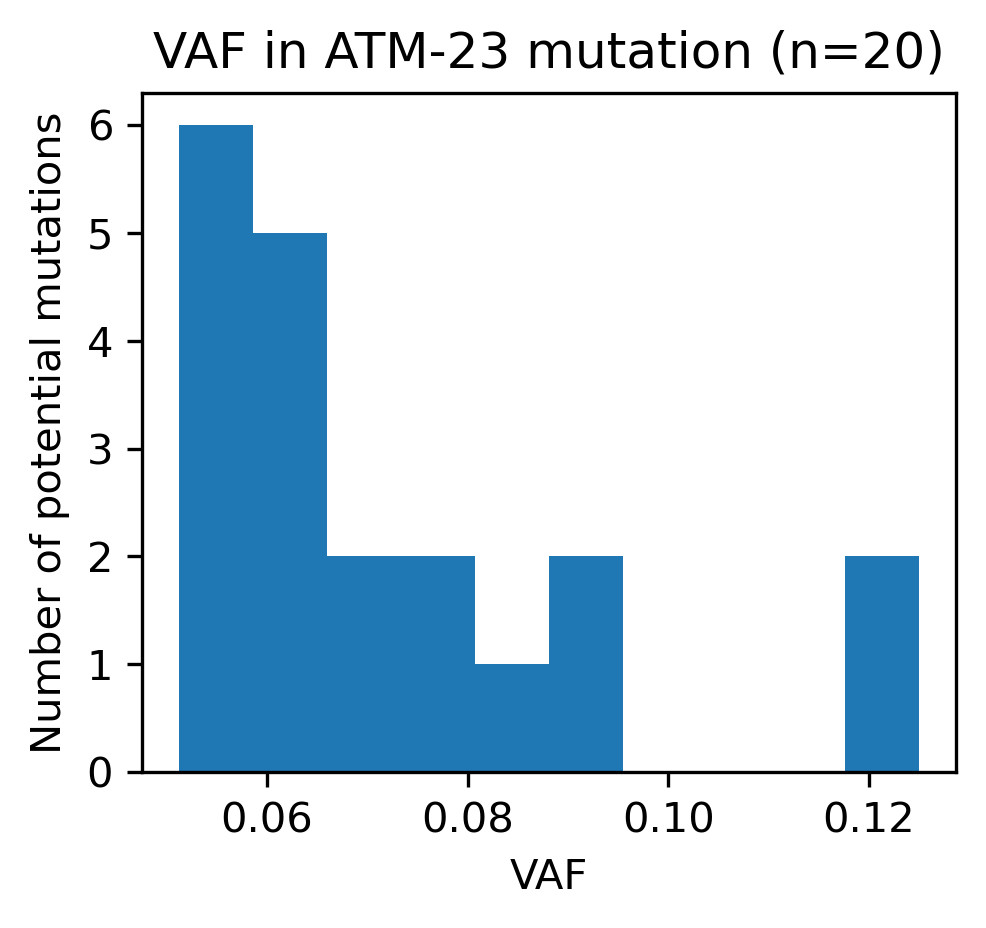

In [37]:
# Histogram
plt.hist(ATM_23['VAF_alt'], 10)
plt.title('VAF in ATM-23 mutation (n=20)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()

In [38]:
### KMT2C_836

KMT2C_836 = CH_mutations_50K_known[(CH_mutations_50K_known['SYMBOL'] == 'KMT2C') & (CH_mutations_50K_known['Prot_pos'] == 836)]
KMT2C_836

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
59,7,152247927,rs758699143,G,A,42.77,8,43,0.186047,0.813953,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/1,"35,8,0",71,NaN,NaN,"71,0,1131,176,1154,1330","28,7,7,1",BaseQRankSum=-3.328;DB;DP=43;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4488075,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
69,7,152247927,rs758699143,G,A,0.00,2,32,0.062500,0.937500,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/0,"30,2,0",30,NaN,NaN,"0,30,952,90,958,1018","28,2,2,0",BaseQRankSum=-1.511;DB;DP=32;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4263031,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
180,7,152247927,rs758699143,G,A,25.78,5,34,0.147059,0.852941,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/1,"29,5,0",54,NaN,NaN,"54,0,848,141,863,1004","23,6,5,0",BaseQRankSum=-0.049;DB;DP=34;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4975447,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
203,7,152247927,rs758699143,G,A,92.77,8,37,0.216216,0.783784,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/1,"29,8,0",99,NaN,NaN,"121,0,841,208,864,1072","27,2,8,0",BaseQRankSum=-2.899;DB;DP=37;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,4658454,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
239,7,152247927,rs758699143,G,A,59.77,10,62,0.161290,0.838710,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/1,"52,10,0",88,NaN,NaN,"88,0,1464,244,1492,1736","42,10,10,0",BaseQRankSum=-2.380;DB;DP=62;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,5495747,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
372,7,152247927,rs758699143,G,A,0.00,3,30,0.100000,0.900000,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/0,"27,3,0",11,NaN,NaN,"0,11,842,81,851,921","23,4,3,0",BaseQRankSum=-2.008;DB;DP=30;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,5603593,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
398,7,152247927,rs758699143,G,A,89.77,8,48,0.166667,0.833333,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/1,"40,8,0",99,NaN,NaN,"118,0,1215,238,1239,1477","33,7,8,0",BaseQRankSum=-2.225;DB;DP=48;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,5561595,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
411,7,152247927,rs758699143,G,A,25.78,6,45,0.133333,0.866667,1,SNV,missense_variant,MODERATE,KMT2C,ENST00000262189,2507.0,836,S/F,rs758699143&COSV51277608,ENSP00000262189,0.0,0.0,0/1,"39,6,0",54,NaN,NaN,"54,0,1223,171,1241,1412","32,7,4,2",BaseQRankSum=-3.180;DB;DP=45;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,.,CSQ=A|missense_variant|MODERATE|KMT2C|ENSG0000...,5820795,chr7,152247927.0,G,A,KMT2C,836,missense_variant,1.0
488,7,152247927,rs758699143,G,A,0.39,6,62,0.096774,0.903226,1,SNV,mi

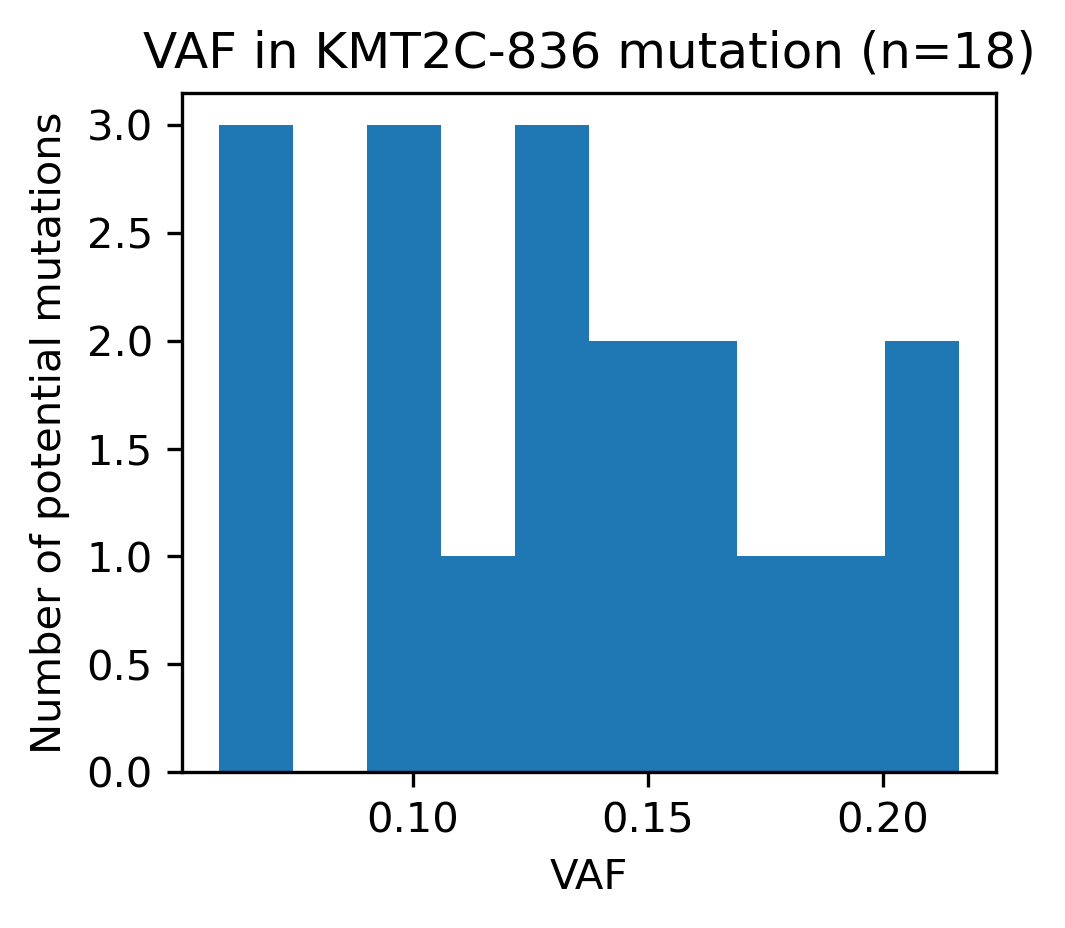

In [39]:
# Histogram
plt.hist(KMT2C_836['VAF_alt'], 10)
plt.title('VAF in KMT2C-836 mutation (n=18)')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.show()

# ANALYSIS 3 (in this case analysis 2 doesn't make sense)

## FILTER BY >=3 READS ALT

In [40]:
CH_mutations_50K_known3 = CH_mutations_50K_known[CH_mutations_50K_known['AD_alt'] > 2]
CH_mutations_50K_known3

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0
2,4,105276128,rs116519313,T,C,241.77,16,99,0.161616,0.838384,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5618.0,1873,I/T,rs116519313&COSV54396330,ENSP00000442788,0.000013,0.000000,0/1,"83,16,0",99,NaN,NaN,"270,0,2401,518,2449,2967","57,26,10,6",BaseQRankSum=3.114;DB;DP=99;ExcessHet=3.0103;M...,C|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=C|3_prime_UTR_variant&NMD_transcript_varia...,4072725,chr4,105276128.0,T,C,TET2,1873,missense_variant,14.0
4,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0
5,20,32434789,rs373221034,C,T,88.77,11,83,0.132530,0.867470,1,SNV,stop_gained,HIGH,ASXL1,ENST00000375687,2077.0,693,R/*,rs373221034&COSV60102332,ENSP00000364839,0.000004,0.000000,0/1,"72,11,0",99,NaN,NaN,"117,0,2380,333,2413,2747","43,29,5,6",BaseQRankSum=-1.435;DB;DP=83;ExcessHet=3.0103;...,T|stop_gained|HIGH|ASXL1|ENSG00000171456|Trans...,.,CSQ=T|stop_gained|HIGH|ASXL1|ENSG00000171456|T...,4421084,chr20,32434789.0,C,T,ASXL1,693,stop_gained,6.0
6,4,105269677,.,T,A,80.77,6,31,0.193548,0.806452,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4112.0,1371,V/D,rs1434595376&COSV54424662,ENSP00000442788,0.000006,0.000017,0/1,"25,6,0",99,NaN,NaN,"109,0,816,185,834,1018","11,14,3,3",BaseQRankSum=-0.863;DP=31;ExcessHet=3.0103;MLE...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4200513,chr4,105269677.0,T,A,TET2,1371,missense_variant,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2,25240359,.,A,C,0.00,9,63,0.142857,0.857143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"54,9,0",16,NaN,NaN,"0,16,1460,159,1485,1628","25,29,0,9",BaseQRankSum=-2.321;DP=63;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,3848350,chr2,25240360.0,A,C,DNMT3A,755,missense_variant,2.0
1092,2,25240359,.,A,C,0.00,9,63,0.142857,0.857143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"54,9,0",16,NaN,NaN,"0,16,1460,159,1485,1628","25,29,0,9",BaseQRankSum=-2.321;DP=63;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,3848350,chr2,25240361.0,A,C,DNMT3A,755,missense_variant,2.0
1094,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.000012,0.000009,0/1,"51,9,0",99,NaN,NaN,"109,0,1568,262,1595,1857","14,37,2,7",BaseQRankSum=-1.609;DB;DP=60;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_v

In [41]:
### Number of different potential CH mutations

print('Total number of CH mutations:')
print(len(CH_mutations_50K_known3))
print()
print('Number of different CH mutations:')
print(len(CH_mutations_50K_known3.groupby(['#CHROM', 'POS', 'REF', 'ALT']).size()))


Total number of CH mutations:
788

Number of different CH mutations:
367


In [42]:
### Number of mutated genes

len(CH_mutations_50K_known3.groupby(['SYMBOL']))

31

In [43]:
### Number of patients with CH mutations

len(CH_mutations_50K_known3['patient'].value_counts())

701

In [44]:
### Number of potential CH mutations per patient

CH_mutations_50K_known3['patient'].value_counts().value_counts()

1    622
2     71
3      8
Name: patient, dtype: int64

In [45]:
### DP, AD & VAF

round(CH_mutations_50K_known3[['DP', 'AD_alt', 'VAF_alt']].describe(), 3)

,DP,AD_alt,VAF_alt
count,788.000,788.000,788.000
mean,73.161,10.942,0.155
std,35.508,6.336,0.058
min,11.000,3.000,0.060
25%,49.000,6.000,0.105
50%,68.000,9.000,0.142
75%,90.000,14.000,0.190
max,274.000,44.000,0.299


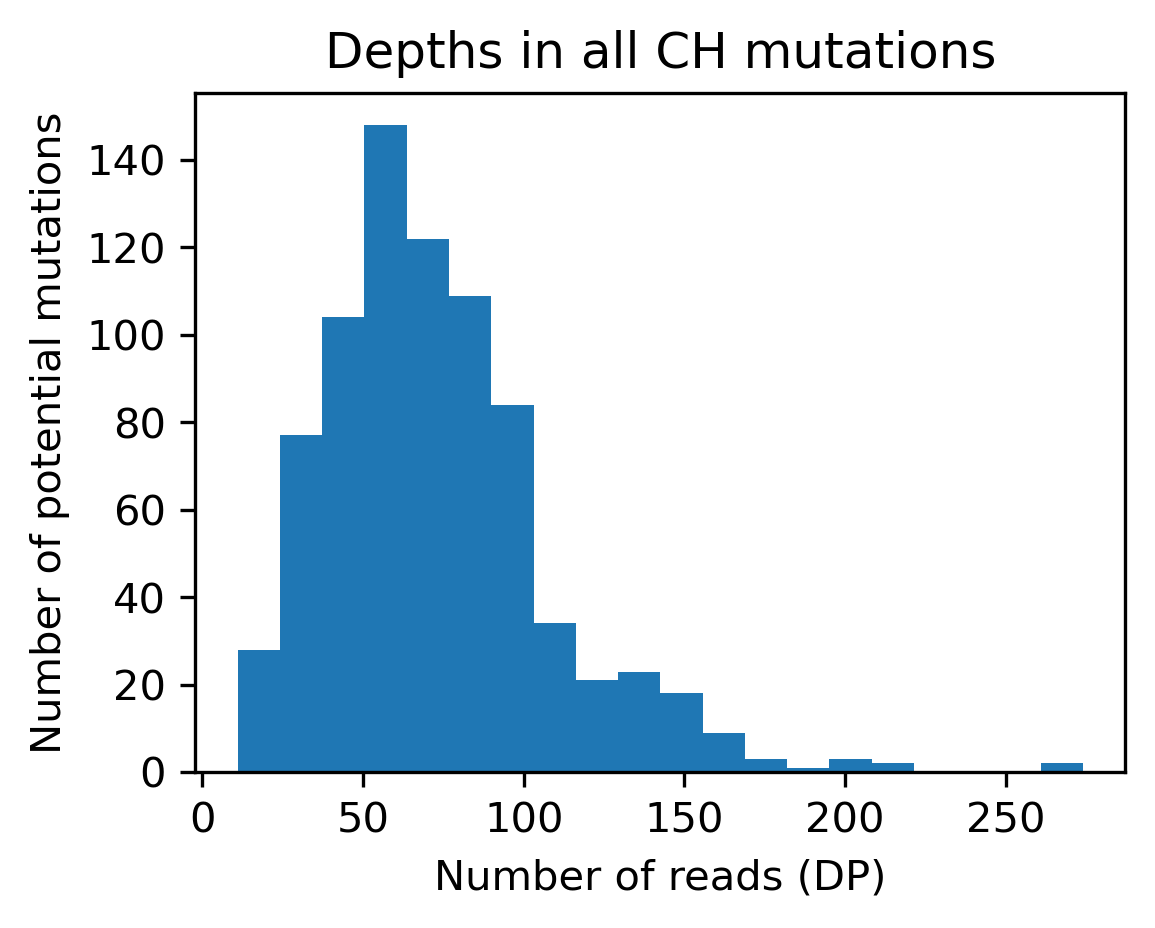

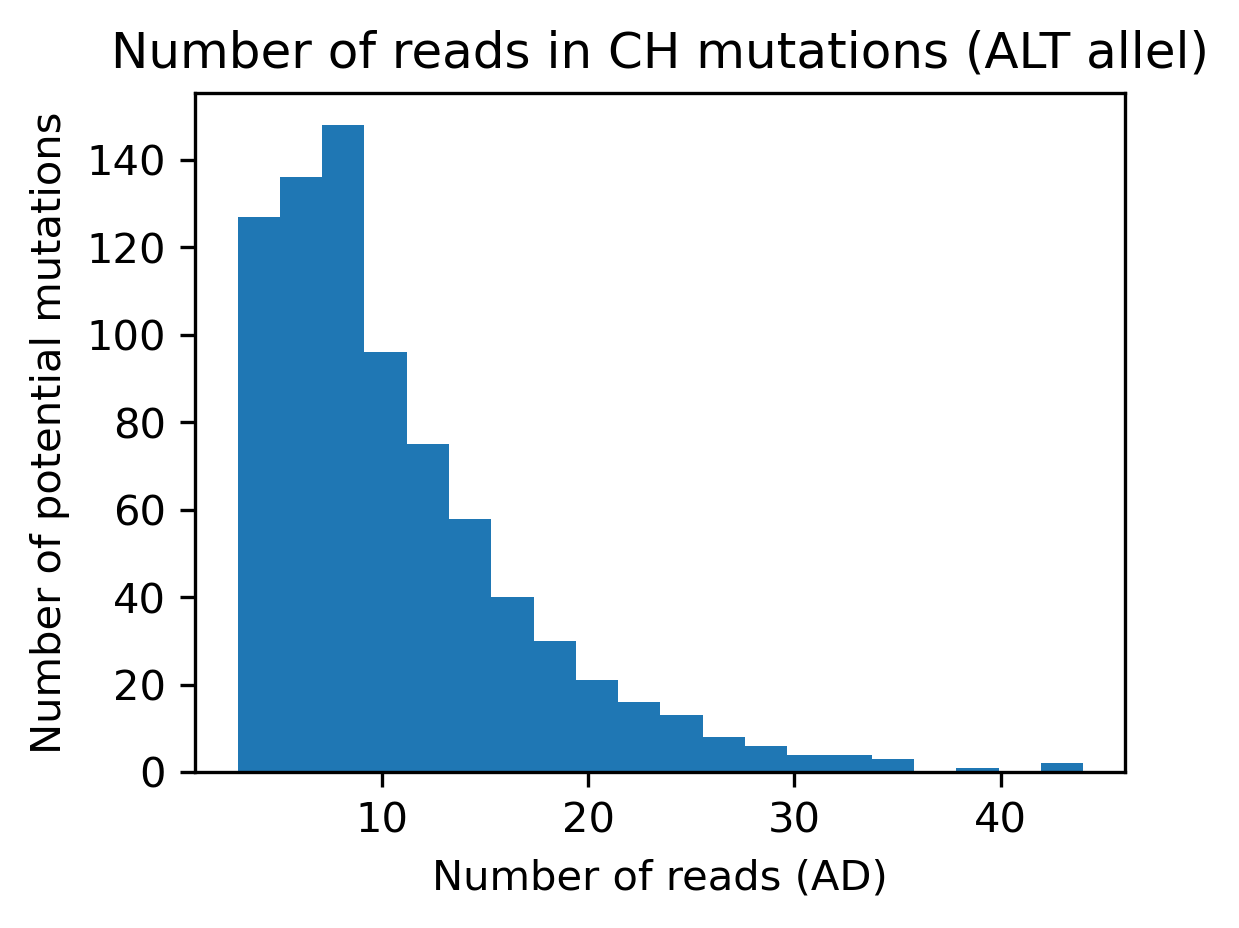

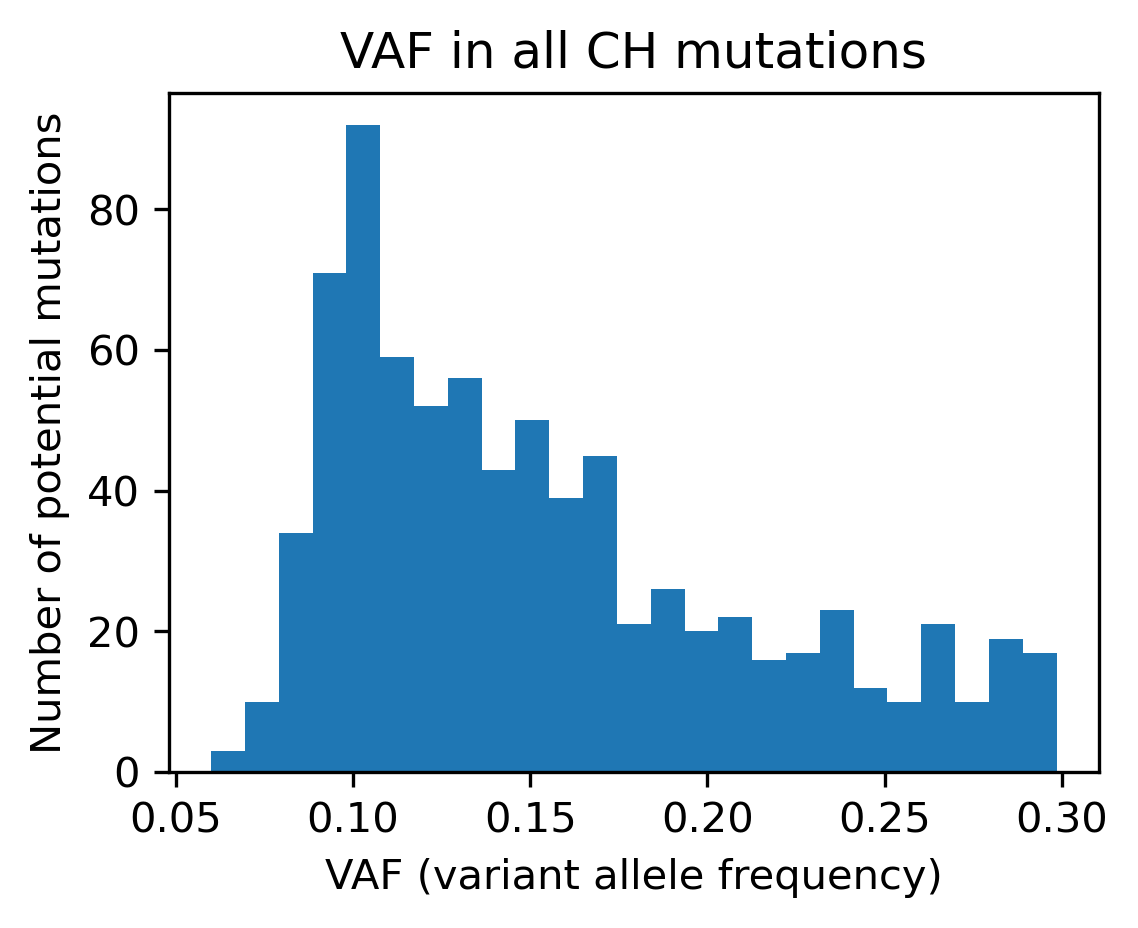

In [46]:
# Histogram DP

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_50K_known3['DP'], 20)
plt.title('Depths in all CH mutations')
plt.xlabel('Number of reads (DP)')
plt.ylabel('Number of potential mutations')
plt.show()

# Histogram AD

plt.rcParams["figure.figsize"] = (4,3)
plt.hist(CH_mutations_50K_known3['AD_alt'], 20)
plt.title('Number of reads in CH mutations (ALT allel)')
plt.xlabel('Number of reads (AD)')
plt.ylabel('Number of potential mutations')
plt.show()

# Histogram VAF

plt.hist(CH_mutations_50K_known3['VAF_alt'], 25)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF (variant allele frequency)')
plt.ylabel('Number of potential mutations')
plt.show()

Total number of variants:
788

Number of variants with VAF < 25%:
706
89.6

Number of variants with VAF < 20%:
610
77.4

Number of variants with VAF < 15%:
436
55.3

Number of variants with VAF < 10%:
127
16.1



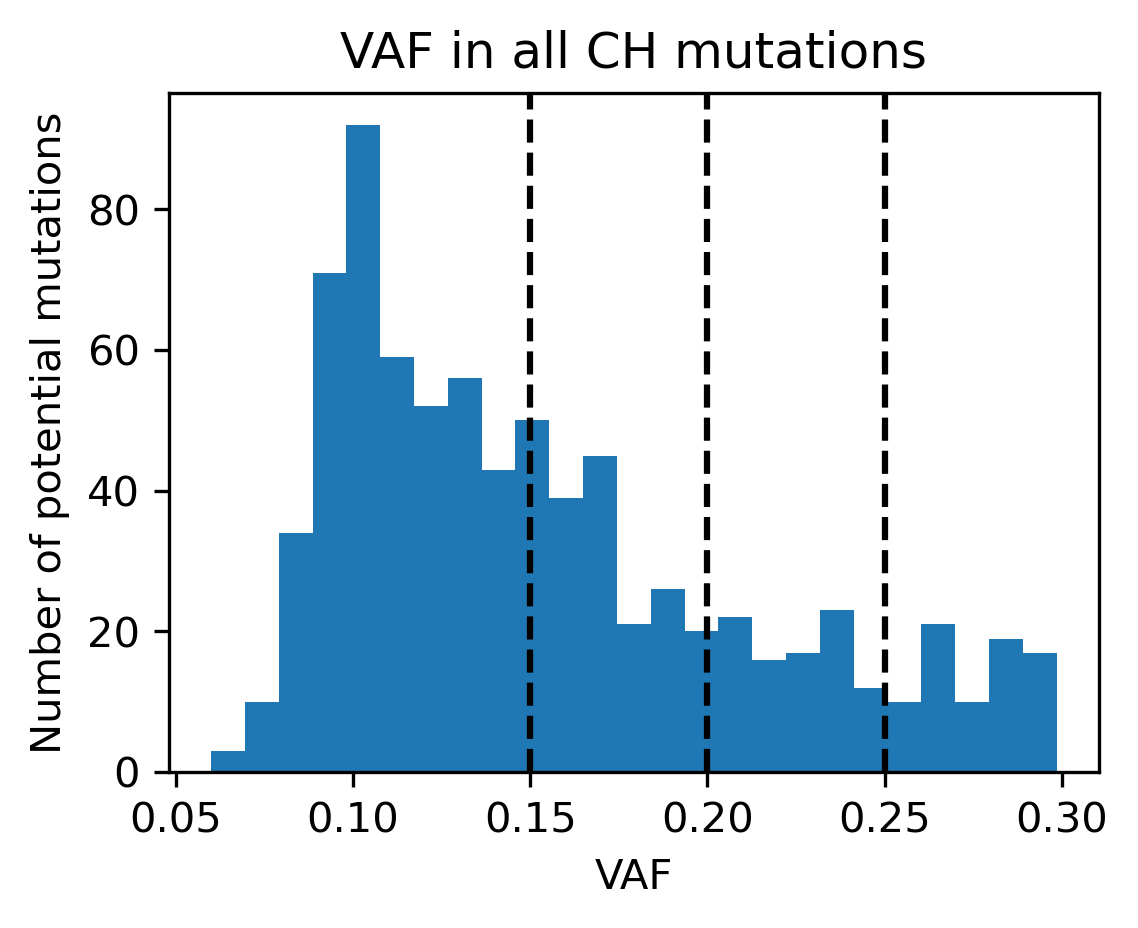

In [47]:
VAFs = CH_mutations_50K_known3['VAF_alt']

print("Total number of variants:")
print(len(VAFs))
print()

print("Number of variants with VAF < 25%:")
VAF_25 = [i for i in VAFs if i < 0.25]
print(len(VAF_25))
print(round(len(VAF_25) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 20%:")
VAF_20 = [i for i in VAFs if i < 0.20]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 15%:")
VAF_20 = [i for i in VAFs if i < 0.15]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

print("Number of variants with VAF < 10%:")
VAF_20 = [i for i in VAFs if i < 0.10]
print(len(VAF_20))
print(round(len(VAF_20) / len(VAFs) *100, 1))
print()

# Histogram VAF with thresholds

plt.hist(CH_mutations_50K_known3['VAF_alt'], 25)
plt.title('VAF in all CH mutations')
plt.xlabel('VAF')
plt.ylabel('Number of potential mutations')
plt.axvline(x=0.25, color='black',linestyle='--')
plt.axvline(x=0.2, color='black',linestyle='--')
plt.axvline(x=0.15, color='black',linestyle='--')
#plt.axvline(x=0.1, color='black',linestyle='--')
plt.show()


In [48]:
### Number of ALT per position

CH_mutations_50K_known3['ALT_num'].value_counts()

1    787
2      1
Name: ALT_num, dtype: int64

In [49]:
### Type of variant

CH_mutations_50K_known3['var_type'].value_counts()

SNV    788
Name: var_type, dtype: int64

In [50]:
### Type of consequence

round(CH_mutations_50K_known3['Consequence_x'].value_counts() / 788 * 100, 1)


missense_variant                          73.4
stop_gained                               24.6
missense_variant&splice_region_variant     1.5
stop_gained&splice_region_variant          0.5
Name: Consequence_x, dtype: float64

In [51]:
### IMPACT

round(CH_mutations_50K_known3['IMPACT'].value_counts().head(20) / 1097 * 100, 1)


MODERATE    53.8
HIGH        18.0
Name: IMPACT, dtype: float64

In [52]:
### Mutations per gene

CH_mutations_50K_known3.groupby(['SYMBOL']).size().sort_values(ascending=False).head(20)

SYMBOL
DNMT3A    494
TET2      103
ASXL1      28
JAK2       28
KMT2C      25
PPM1D      16
SRSF2      15
SF3B1      15
ATM        10
TP53       10
CHEK2       7
KRAS        6
IDH2        4
KMT2D       3
NF1         2
ARID2       2
DNMT3B      2
EPHA3       2
KDM6A       2
NRAS        2
dtype: int64

Text(0.5, 1.0, 'Number of mutations per gene')

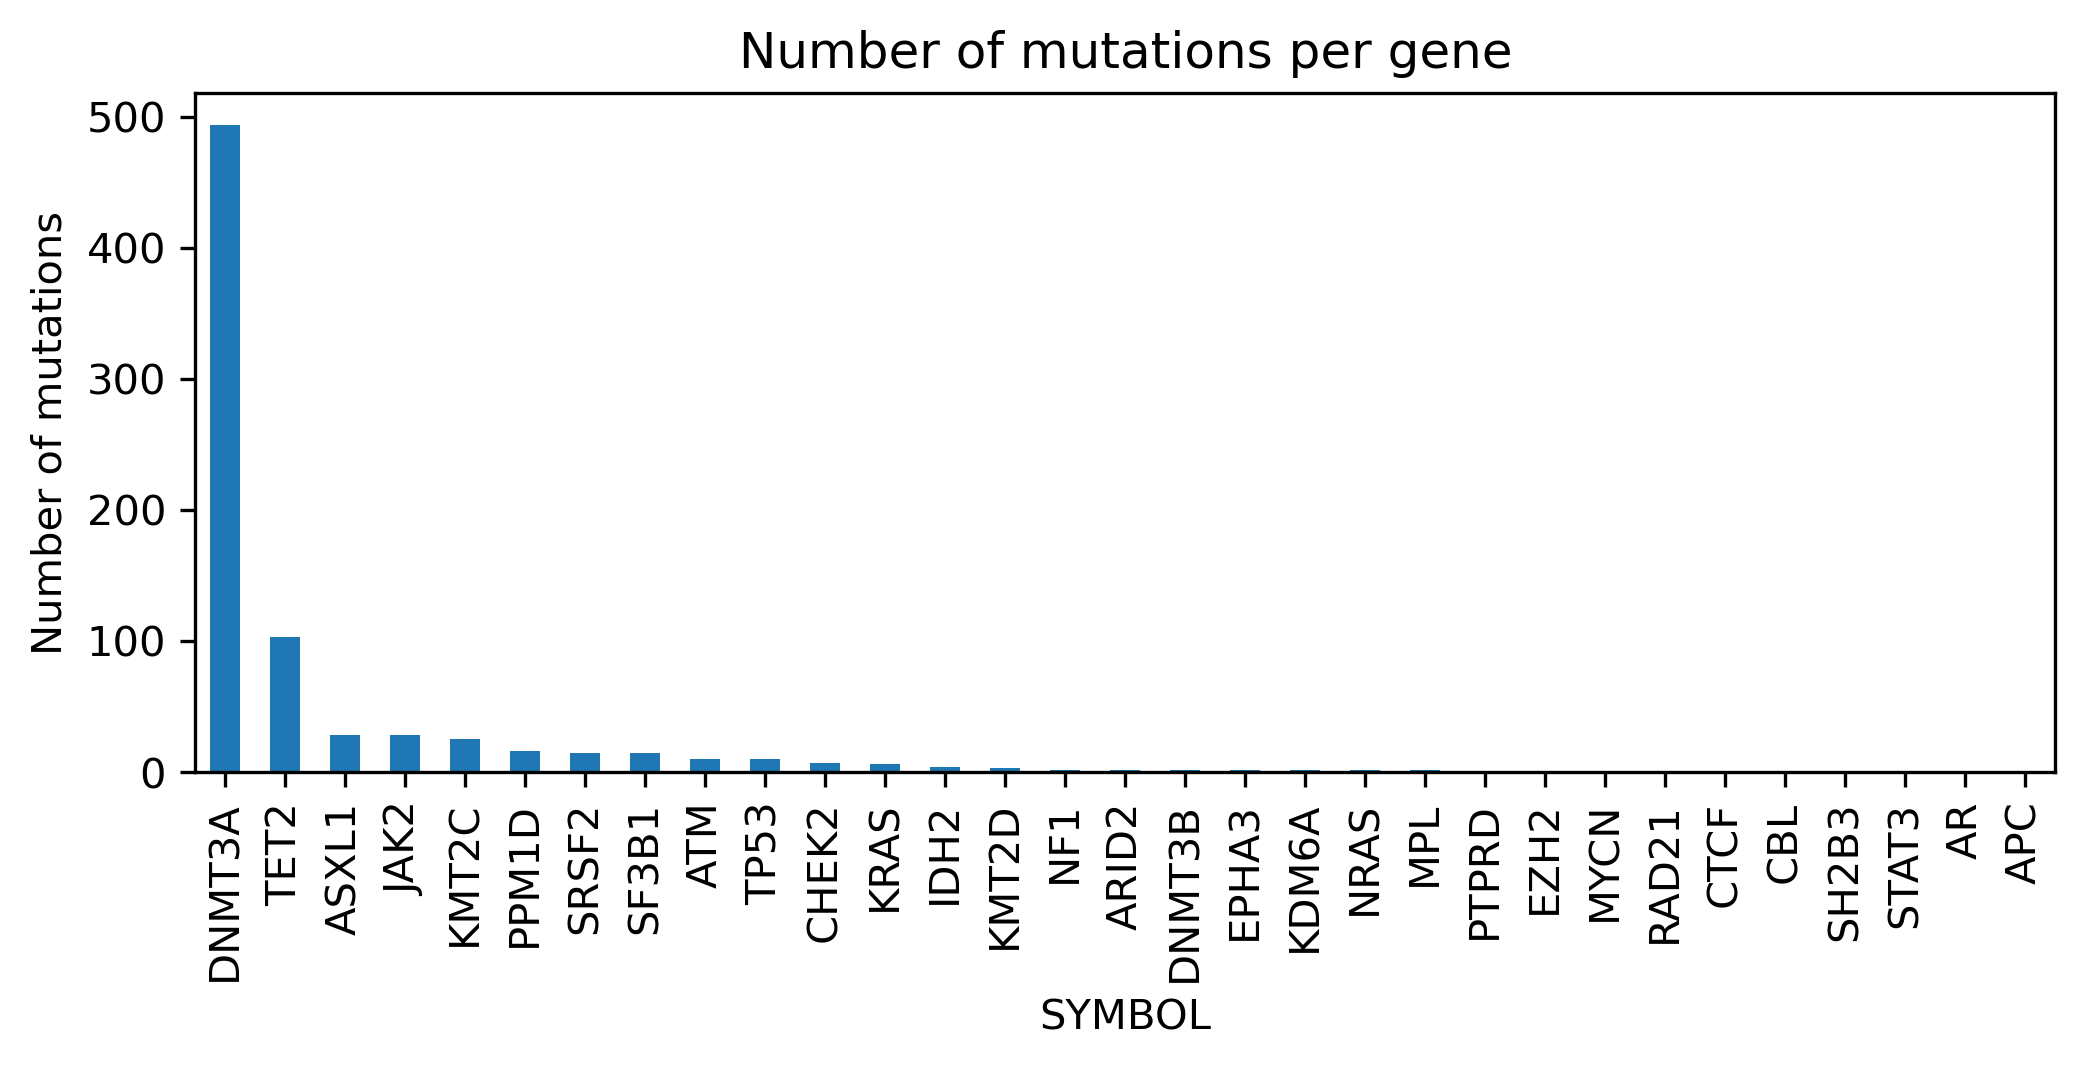

In [53]:
# Histogram

graph = CH_mutations_50K_known3.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(8,3))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutations per gene")

In [54]:
#from IPython.core.display import HTML

### Mutations per gene position

mut_genpos = CH_mutations_50K_known3.groupby(['SYMBOL', 'Prot_pos']).size().sort_values(ascending=False)
df = mut_genpos.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Protein position','Number mutations']
df.head(10).style.set_properties(**{'text-align':'center'})
#display(a)
#display(HTML(mut_genpos.head(20).to_frame().to_html()))

,Gene symbol,Protein position,Number mutations
0,DNMT3A,882,90
1,JAK2,617,28
2,KMT2C,836,15
3,SRSF2,95,14
4,DNMT3A,736,14
5,DNMT3A,771,13
6,DNMT3A,635,12
7,DNMT3A,904,12
8,DNMT3A,729,11
9,DNMT3A,581,11


In [55]:
### Number of mutation sites per gene

mut_genpos_n =mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False)
df = mut_genpos_n.to_frame()
df = df.reset_index()
df.columns = ['Gene symbol','Number mutation sites']
df.head(10).style.set_properties(**{'text-align':'center'})

,Gene symbol,Number mutation sites
0,DNMT3A,132
1,TET2,68
2,ASXL1,16
3,PPM1D,9
4,ATM,9
5,TP53,8
6,KMT2C,7
7,SF3B1,6
8,KRAS,3
9,KMT2D,3


Text(0.5, 1.0, 'Number of mutation sites per gene')

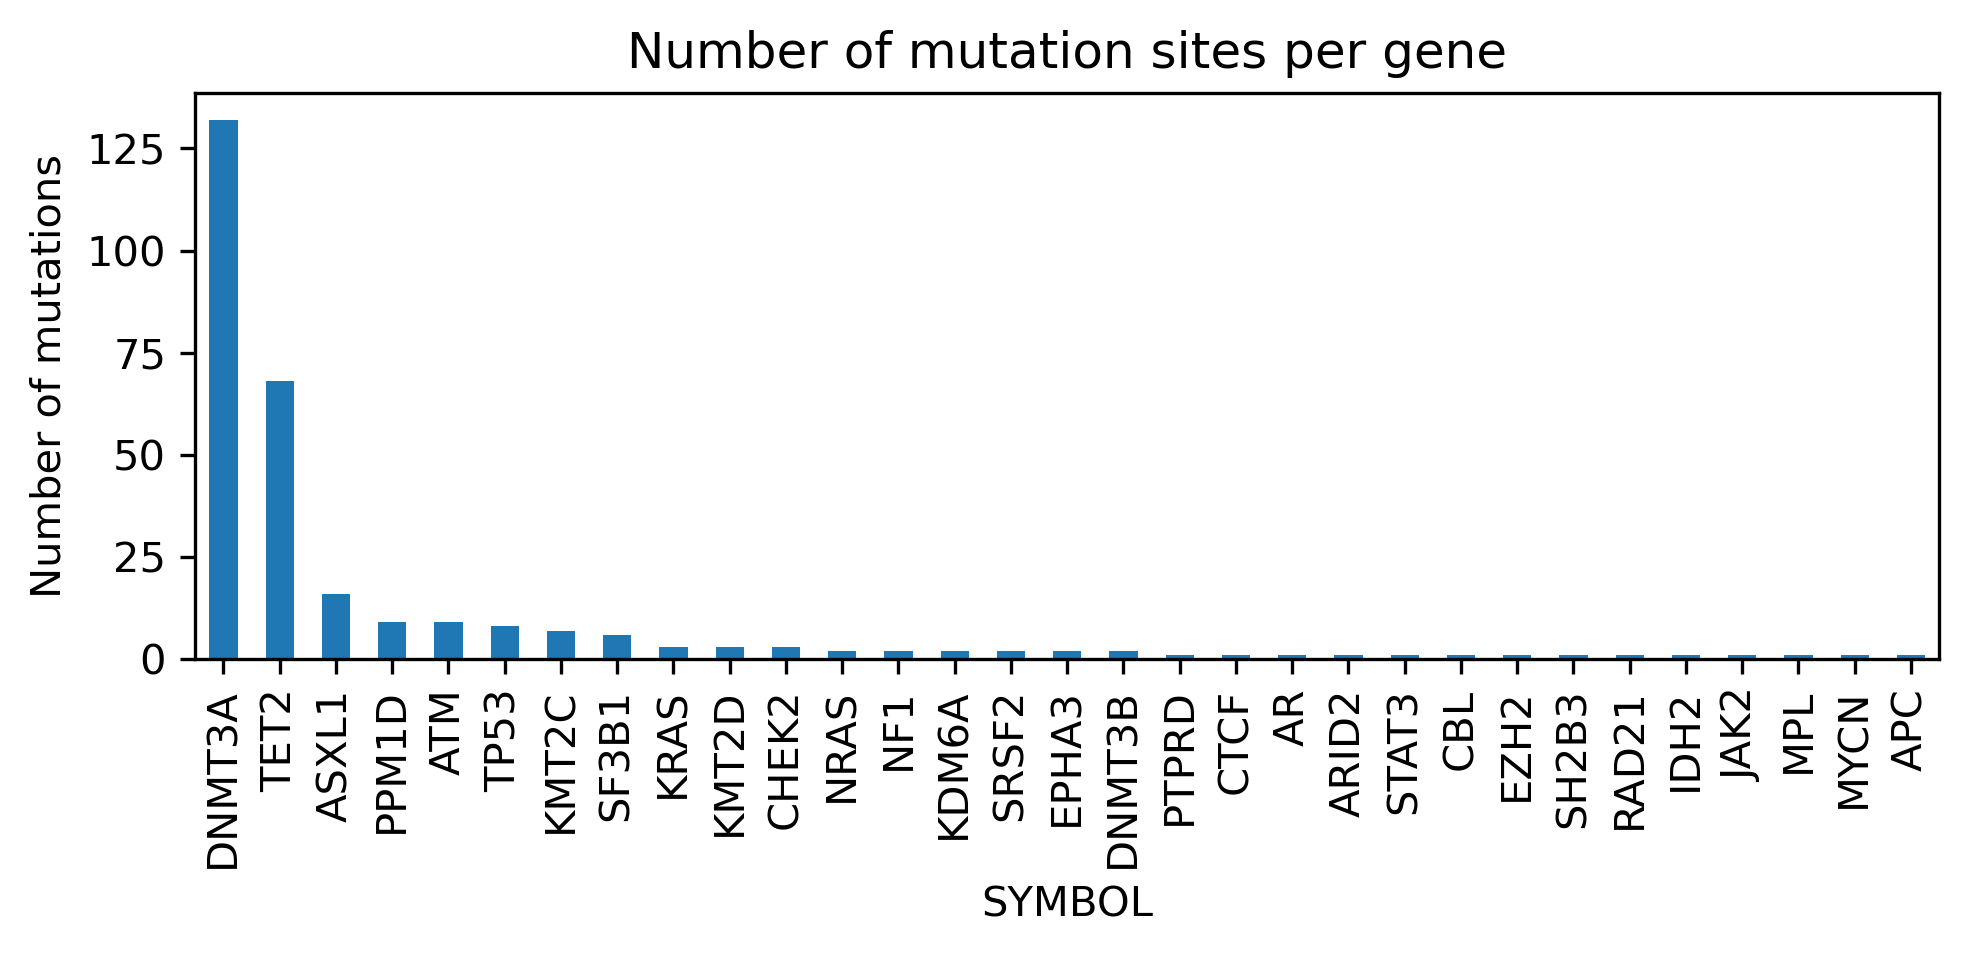

In [56]:
# Histogram

graph = mut_genpos.groupby(['SYMBOL']).size().sort_values(ascending=False).plot.bar(figsize=(7.5,2.5))
graph.set_ylabel("Number of mutations")
graph.set_title("Number of mutation sites per gene")

# AGE
# MOVED TO ANOTHER NOTEBOOK!

In [57]:
age = pd.read_csv("/workspace/projects/clonalhemato_ukb/analysis_50k_202103/data/ukb50k_age_recruitment-Copy1.txt",
                 header=None)
age

,0
0,eid 21022-0.0\n1000019 54
1,1000022 53\n1000035 59
2,1000046 45\n1000054 65
3,1000063 46\n1000078
4,1000081 61\n1000090 54
...,...
251238,6024779 60\n6024785 41
251239,6024796 49\n6024805 61
251240,6024812 60\n6024829 65
251241,6024837 61\n6024841 47


In [58]:
filename = "/workspace/projects/clonalhemato_ukb/analysis_50k_202103/data/ukb50k_age_recruitment-Copy1.txt"

lines = ''.join([line for line in open(filename, 'rt')])
lines = lines.replace('"',' ')

age_df = pd.read_csv(StringIO(lines), sep= ' ')
age_df = age_df[['eid', '21022-0.0']] 
age_df = age_df.rename(columns = {'eid': 'patient', '21022-0.0': 'age_recruit'}, inplace = False)

age_df


,patient,age_recruit
0,1000019,54.0
1,1000022,53.0
2,1000035,59.0
3,1000046,45.0
4,1000054,65.0
...,...,...
502480,6024829,65.0
502481,6024837,61.0
502482,6024841,47.0
502483,6024853,54.0


In [59]:
age_df = age_df[age_df['age_recruit'].notnull()]
age_df = age_df[age_df['age_recruit'] > 0]
age_df['age_recruit'] = age_df['age_recruit'].apply(lambda x: int(x))
age_df

,patient,age_recruit
0,1000019,54
1,1000022,53
2,1000035,59
3,1000046,45
4,1000054,65
...,...,...
502480,6024829,65
502481,6024837,61
502482,6024841,47
502483,6024853,54


In [60]:
age_df[age_df['patient']==4364799]

,patient,age_recruit


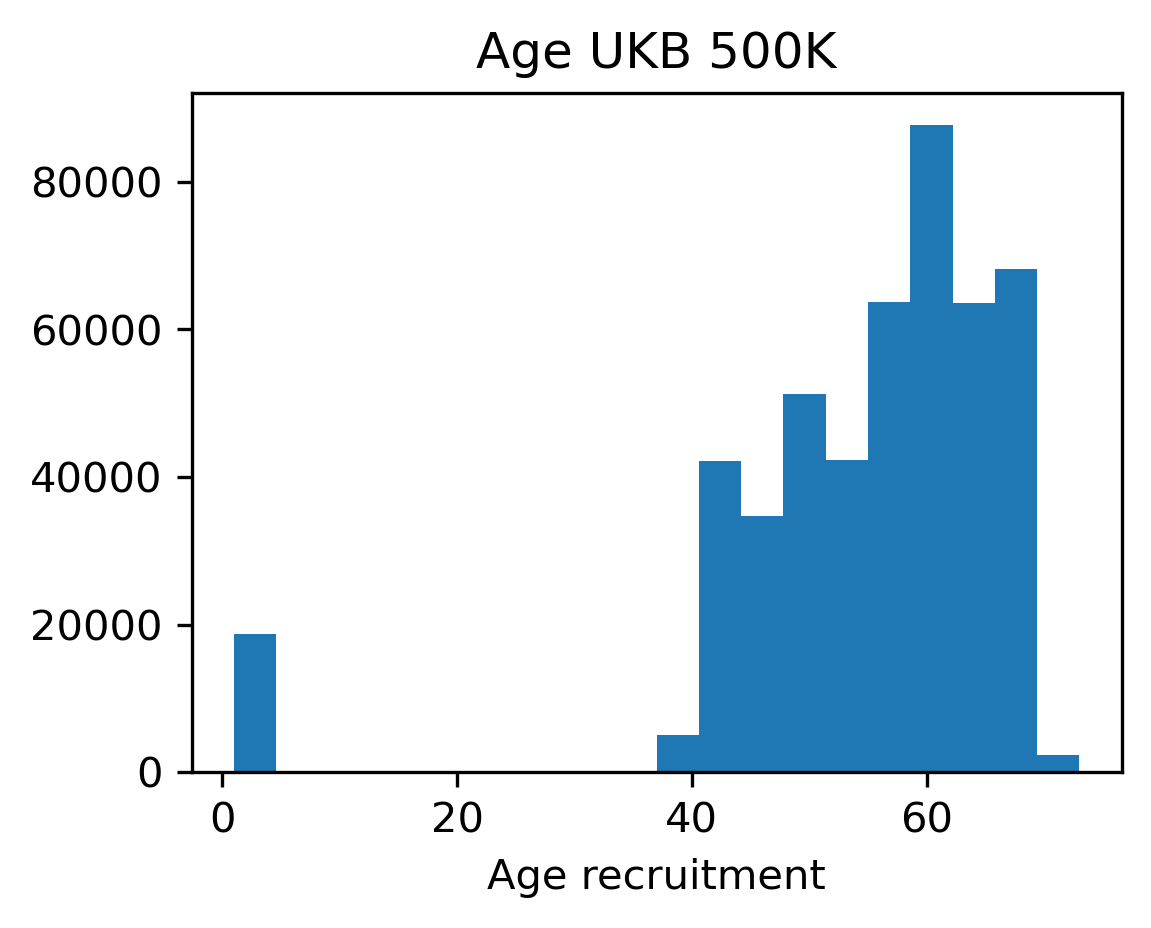

In [61]:
plt.hist(age_df['age_recruit'],20)
plt.title('Age UKB 500K')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()

In [62]:
CH_mutations_50K_known

,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size
0,22,28711911,rs752493299,C,T,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant&splice_region_variant,MODERATE,CHEK2,ENST00000382580,919.0,307,A/T,rs752493299,ENSP00000372023,0.000004,0.000000,0/1,"14,2,0",1,NaN,NaN,"1,0,498,43,504,547","13,1,1,1",BaseQRankSum=-1.875;DB;DP=17;ExcessHet=3.0103;...,T|missense_variant&splice_region_variant|MODER...,.,CSQ=T|missense_variant&splice_region_variant|M...,4181038,chr22,28699926.0,C,T,CHEK2,307,missense_variant,1.0
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0
2,4,105276128,rs116519313,T,C,241.77,16,99,0.161616,0.838384,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5618.0,1873,I/T,rs116519313&COSV54396330,ENSP00000442788,0.000013,0.000000,0/1,"83,16,0",99,NaN,NaN,"270,0,2401,518,2449,2967","57,26,10,6",BaseQRankSum=3.114;DB;DP=99;ExcessHet=3.0103;M...,C|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=C|3_prime_UTR_variant&NMD_transcript_varia...,4072725,chr4,105276128.0,T,C,TET2,1873,missense_variant,14.0
3,9,5050713,rs907414891,A,G,0.00,2,19,0.105263,0.894737,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,496.0,166,I/V,rs907414891,ENSP00000371067,NaN,NaN,0/0,"17,2,0",8,0|1,5050706_C_T,"0,8,550,51,556,599","8,9,1,1",BaseQRankSum=-1.722;DB;DP=21;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,4093253,chr9,5050713.0,A,G,JAK2,166,missense_variant,1.0
4,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2,25240359,.,A,C,0.00,9,63,0.142857,0.857143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"54,9,0",16,NaN,NaN,"0,16,1460,159,1485,1628","25,29,0,9",BaseQRankSum=-2.321;DP=63;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,3848350,chr2,25240361.0,A,C,DNMT3A,755,missense_variant,2.0
1093,11,119277836,.,G,A,0.00,2,29,0.068966,0.931034,1,SNV,missense_variant,MODERATE,CBL,ENST00000264033,1087.0,363,V/M,NaN,ENSP00000264033,NaN,NaN,0/0,"27,2,0",38,NaN,NaN,"0,38,889,81,895,939","8,19,1,1",BaseQRankSum=-1.494;DP=29;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,3822096,chr11,119277836.0,G,A,CBL,363,missense_variant,1.0
1094,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.000012,0.000009,0/1,"51,9,0",99,NaN,NaN,"109,0,1568,262,1595,1857","14,37,2,7",BaseQRankSum=-1.609;DB;DP=60;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|D

In [63]:
CH_mutations_50K_known_age = pd.merge(CH_mutations_50K_known, age_df, 
                                      how='left', on = 'patient')

CH_mutations_50K_known_age
# CH_mutations_50K = pd.merge(CH_mutations_50K, ch_mskcc,  how='left',
#                             left_on=['SYMBOL', 'Prot_pos', 'REF', 'ALT'],
#                             right_on = ['Hugo_Symbol','Protein_position', 'Reference_Allele', 'Tumor_Seq_Allele2'])


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size,age_recruit
0,22,28711911,rs752493299,C,T,0.01,2,16,0.125000,0.875000,1,SNV,missense_variant&splice_region_variant,MODERATE,CHEK2,ENST00000382580,919.0,307,A/T,rs752493299,ENSP00000372023,0.000004,0.000000,0/1,"14,2,0",1,NaN,NaN,"1,0,498,43,504,547","13,1,1,1",BaseQRankSum=-1.875;DB;DP=17;ExcessHet=3.0103;...,T|missense_variant&splice_region_variant|MODER...,.,CSQ=T|missense_variant&splice_region_variant|M...,4181038,chr22,28699926.0,C,T,CHEK2,307,missense_variant,1.0,61.0
1,2,25240399,rs749282210,C,G,37.77,9,75,0.120000,0.880000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2225.0,742,R/P,rs749282210&COSV53066124,ENSP00000264709,0.000000,0.000000,0/1,"66,9,0",66,NaN,NaN,"66,0,1939,265,1966,2231","35,31,4,5",BaseQRankSum=-0.477;DB;DP=75;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=G|missense_variant|MODERATE|DNMT3A|ENSG000...,4471587,chr2,25240399.0,C,G,DNMT3A,742,missense_variant,2.0,63.0
2,4,105276128,rs116519313,T,C,241.77,16,99,0.161616,0.838384,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,5618.0,1873,I/T,rs116519313&COSV54396330,ENSP00000442788,0.000013,0.000000,0/1,"83,16,0",99,NaN,NaN,"270,0,2401,518,2449,2967","57,26,10,6",BaseQRankSum=3.114;DB;DP=99;ExcessHet=3.0103;M...,C|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=C|3_prime_UTR_variant&NMD_transcript_varia...,4072725,chr4,105276128.0,T,C,TET2,1873,missense_variant,14.0,NaN
3,9,5050713,rs907414891,A,G,0.00,2,19,0.105263,0.894737,1,SNV,missense_variant,MODERATE,JAK2,ENST00000381652,496.0,166,I/V,rs907414891,ENSP00000371067,NaN,NaN,0/0,"17,2,0",8,0|1,5050706_C_T,"0,8,550,51,556,599","8,9,1,1",BaseQRankSum=-1.722;DB;DP=21;ExcessHet=3.0103;...,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,.,CSQ=G|missense_variant|MODERATE|JAK2|ENSG00000...,4093253,chr9,5050713.0,A,G,JAK2,166,missense_variant,1.0,65.0
4,4,105269641,rs775677220,G,A,322.77,14,64,0.218750,0.781250,1,SNV,missense_variant,MODERATE,TET2,ENST00000540549,4076.0,1359,R/H,rs775677220&COSV54396133,ENSP00000442788,NaN,NaN,0/1,"50,14,0",99,NaN,NaN,"351,0,1575,502,1618,2119","29,21,6,8",BaseQRankSum=1.980;DB;DP=64;ExcessHet=3.0103;M...,A|missense_variant|MODERATE|TET2|ENSG000001687...,.,CSQ=A|3_prime_UTR_variant&NMD_transcript_varia...,4388197,chr4,105269641.0,G,A,TET2,1359,missense_variant,3.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2,25240359,.,A,C,0.00,9,63,0.142857,0.857143,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2265.0,755,F/L,NaN,ENSP00000264709,NaN,NaN,0/0,"54,9,0",16,NaN,NaN,"0,16,1460,159,1485,1628","25,29,0,9",BaseQRankSum=-2.321;DP=63;ExcessHet=3.0103;MLE...,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=C|missense_variant|MODERATE|DNMT3A|ENSG000...,3848350,chr2,25240361.0,A,C,DNMT3A,755,missense_variant,2.0,NaN
1093,11,119277836,.,G,A,0.00,2,29,0.068966,0.931034,1,SNV,missense_variant,MODERATE,CBL,ENST00000264033,1087.0,363,V/M,NaN,ENSP00000264033,NaN,NaN,0/0,"27,2,0",38,NaN,NaN,"0,38,889,81,895,939","8,19,1,1",BaseQRankSum=-1.494;DP=29;ExcessHet=3.0103;MLE...,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,.,CSQ=A|missense_variant|MODERATE|CBL|ENSG000001...,3822096,chr11,119277836.0,G,A,CBL,363,missense_variant,1.0,65.0
1094,2,25240717,rs761064473,C,T,80.77,9,60,0.150000,0.850000,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2096.0,699,G/D,rs761064473&COSV53041469,ENSP00000264709,0.000012,0.000009,0/1,"51,9,0",99,NaN,NaN,"109,0,1568,262,1595,1857","14,37,2,7",BaseQRankSum=-1.609;DB;DP=60;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT

In [64]:
CH_mutations_50K_known_age[CH_mutations_50K_known_age['age_recruit'] < 5]


,#CHROM,POS,ID,REF,ALT,QUAL,AD_alt,DP,VAF_alt,VAF_ref,ALT_num,var_type,Consequence_x,IMPACT,SYMBOL,ENST,CDS_pos,Prot_pos,AA_change,rs_ID,ENSP,gnomAD_AF,gnomAD_AF_NFE,GT,AD,GQ,PGT,PID,PL,SB,INFO,VEP_cano,FILTER,VEP,patient,Chromosome,pos_hg38,Reference_Allele,Tumor_Seq_Allele2,Hugo_Symbol,Protein_position,Consequence_y,size,age_recruit
15,2,25243931,rs144689354,G,A,159.77,10,67,0.149254,0.850746,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,1903.0,635,R/W,rs144689354&CM137477&COSV53038925,ENSP00000264709,0.000064,0.000082,0/1,"57,10,0",99,NaN,NaN,"188,0,1624,360,1655,2014","25,32,4,6",BaseQRankSum=2.098;DB;DP=67;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4070831,chr2,25243931.0,G,A,DNMT3A,635,missense_variant,38.0,1.0
76,2,25234307,rs149095705,G,A,679.77,32,110,0.290909,0.709091,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2711.0,904,P/L,rs149095705&CM144160&COSV53041674,ENSP00000264709,0.000036,0.000070,0/1,"78,32,0",99,NaN,NaN,"708,0,2016,942,2113,3054","41,37,16,16",BaseQRankSum=1.410;DB;DP=110;ExcessHet=3.0103;...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4734032,chr2,25234307.0,G,A,DNMT3A,904,missense_variant,43.0,1.0
79,2,25240313,rs779626155,G,A,303.77,16,75,0.213333,0.786667,1,SNV,stop_gained,HIGH,DNMT3A,ENST00000264709,2311.0,771,R/*,rs779626155&COSV53041751&COSV53073691,ENSP00000264709,0.000028,0.000018,0/1,"59,16,0",99,NaN,NaN,"332,0,1747,509,1795,2304","31,28,9,7",BaseQRankSum=0.902;DB;DP=75;ExcessHet=3.0103;M...,CSQ=A|stop_gained|HIGH|DNMT3A|ENSG00000119772|...,.,CSQ=A|stop_gained|HIGH|DNMT3A|ENSG00000119772|...,4229638,chr2,25240313.0,G,A,DNMT3A,771,stop_gained,36.0,1.0
91,2,25234307,rs149095705,G,A,345.77,19,98,0.193878,0.806122,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2711.0,904,P/L,rs149095705&CM144160&COSV53041674,ENSP00000264709,0.000036,0.000070,0/1,"79,19,0",99,NaN,NaN,"374,0,2309,611,2366,2977","37,42,10,9",BaseQRankSum=0.783;DB;DP=98;ExcessHet=3.0103;M...,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=A|missense_variant|MODERATE|DNMT3A|ENSG000...,4153322,chr2,25234307.0,G,A,DNMT3A,904,missense_variant,43.0,1.0
97,2,25243930,rs751562376,C,T,403.77,21,86,0.244186,0.755814,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,1904.0,635,R/Q,rs751562376&COSV53039784&COSV53040573,ENSP00000264709,0.000006,0.000000,0/1,"65,21,0",99,NaN,NaN,"432,0,1905,626,1968,2594","41,24,14,7",BaseQRankSum=-0.777;DB;DP=86;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,.,CSQ=T|missense_variant|MODERATE|DNMT3A|ENSG000...,4548931,chr2,25243930.0,C,T,DNMT3A,635,missense_variant,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,17,7674229,rs121912656,C,T,0.00,2,30,0.066667,0.933333,1,SNV,missense_variant,MODERATE,TP53,ENST00000269305,734.0,245,G/D,rs121912656&CM010464&CM900209&COSV52666323&COS...,ENSP00000269305,0.000004,0.000000,0/0,"28,2,0",41,NaN,NaN,"0,41,935,84,940,984","16,12,1,1",BaseQRankSum=-1.390;DB;DP=30;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|TP53|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|TP53|ENSG00000...,3356395,chr17,7674229.0,C,T,TP53,245,missense_variant,1.0,1.0
978,17,7674229,rs121912656,C,T,0.00,2,30,0.066667,0.933333,1,SNV,missense_variant,MODERATE,TP53,ENST00000269305,734.0,245,G/D,rs121912656&CM010464&CM900209&COSV52666323&COS...,ENSP00000269305,0.000004,0.000000,0/0,"28,2,0",41,NaN,NaN,"0,41,935,84,940,984","16,12,1,1",BaseQRankSum=-1.390;DB;DP=30;ExcessHet=3.0103;...,CSQ=T|missense_variant|MODERATE|TP53|ENSG00000...,.,CSQ=T|missense_variant|MODERATE|TP53|ENSG00000...,3356395,chr17,7674230.0,C,T,TP53,245,missense_variant,5.0,1.0
979,2,25240402,.,G,C,13.95,8,84,0.095238,0.904762,1,SNV,missense_variant,MODERATE,DNMT3A,ENST00000264709,2222.0,741,A/G,

In [65]:
CH_mutations_50K_known_age['age_recruit'].describe()

count    920.000000
mean      55.920652
std       16.376660
min        1.000000
25%       54.000000
50%       61.000000
75%       65.000000
max       70.000000
Name: age_recruit, dtype: float64

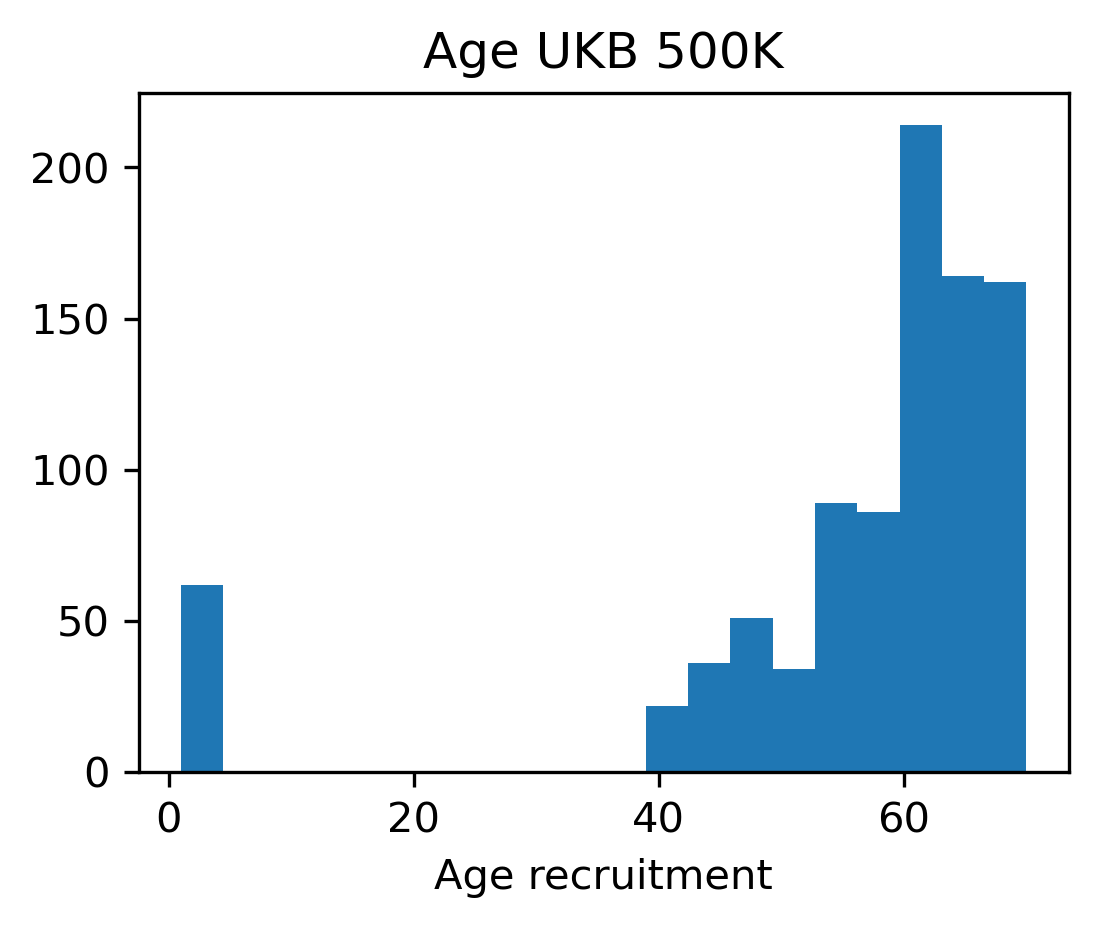

In [66]:
plt.hist(CH_mutations_50K_known_age['age_recruit'],20)
plt.title('Age UKB 500K')
plt.xlabel('Age recruitment')
plt.ylabel('')
plt.show()